Importing libraries and assign the dataset into variable df. Then prints out df to ensure that the file was loaded correctly.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from joblib import dump


df= pd.read_csv("loan_data.csv")
df 

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

# 1. Data Exploration

Check the shape of the data. Tells how many rows of data and how many features it has.

In [103]:
df.shape    

(45000, 14)

df.info() to see any missing data, data types of columns which helps ensure no missing values are present and allow for appropriate functions done to features based on datatype. We can see that there are no missing values in our dataset. We can also see that all columns are numeric so no data encoding or parsing needs to be done. 

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

df.describe to see if there are any values that are incorrect.

In [105]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

add the parameter include='object' to see information about all categorical features. We can now see that we can do OHE when setting up our data for our model.

In [106]:
df.describe(include='object')

person_gender person_education person_home_ownership loan_intent  \
count          45000            45000                 45000       45000   
unique             2                5                     4           6   
top             male         Bachelor                  RENT   EDUCATION   
freq           24841            13399                 23443        9153   

       previous_loan_defaults_on_file  
count                           45000  
unique                              2  
top                               Yes  
freq                            22858

With this, we can deduce that there is no errors within the dataset and no data cleaning needs to be done.

In [107]:
print(df.isnull().sum())


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [108]:
print("Number of duplicates:",df.duplicated().sum())

Number of duplicates: 0


SUMMARY:

Shape of the dataset: (45,000, 14) - The dataset contains 45,000 records and 14 columns.

Columns and Data Types:

float64: person_age, person_income, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length
int64: person_emp_exp, credit_score, loan_status
object: person_gender, person_education, person_home_ownership, loan_intent, previous_loan_defaults_on_file

Our goal for the model is to predict loan_status. Whether a person would qualify for a loan.

Statistical Summary:

The person_age ranges from 20 to 144, which includes potential outliers (age > 100).

person_income has a mean of approximately 80,319 but also shows a high maximum value (7,200,766), indicating possible income outliers.

loan_amnt has a median of 8,000, with a max value of 35,000.

credit_score has a range from 390 to 850, which is typical for credit scores.

loan_status shows a mean of 0.22, this indicates that out of 45,000 records, only 22% is approved.

Data health:
The dataset has no missing and duplicated values.

In [109]:
print("\nUnique Values in Each Column:")
print(df.nunique())
# this will show the number of unique values in each column, which can help identify categorical features.


Unique Values in Each Column:
person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64


In [110]:
# seperates numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

#shows the numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
Categorical Columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [111]:
# displays unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: person_gender
Unique Values: ['female' 'male']

Column: person_education
Unique Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

Column: person_home_ownership
Unique Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Column: loan_intent
Unique Values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column: previous_loan_defaults_on_file
Unique Values: ['No' 'Yes']


We can see that the numerical and categorical features are:

Numerical Columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']

Categorical Columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

For categorical columns, we can see that the unique values are:

Column: person_gender
Unique Values: ['female' 'male']

Column: person_education
Unique Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

Column: person_home_ownership
Unique Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Column: loan_intent
Unique Values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column: previous_loan_defaults_on_file
Unique Values: ['No' 'Yes']



We will now be visualising the data.

Index([0, 1], dtype='int64', name='loan_status')


C:\Users\benna\AppData\Local\Temp\ipykernel_20644\3785000966.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_status_counts.index, y=loan_status_counts, ax=axes[0], palette='tab10')


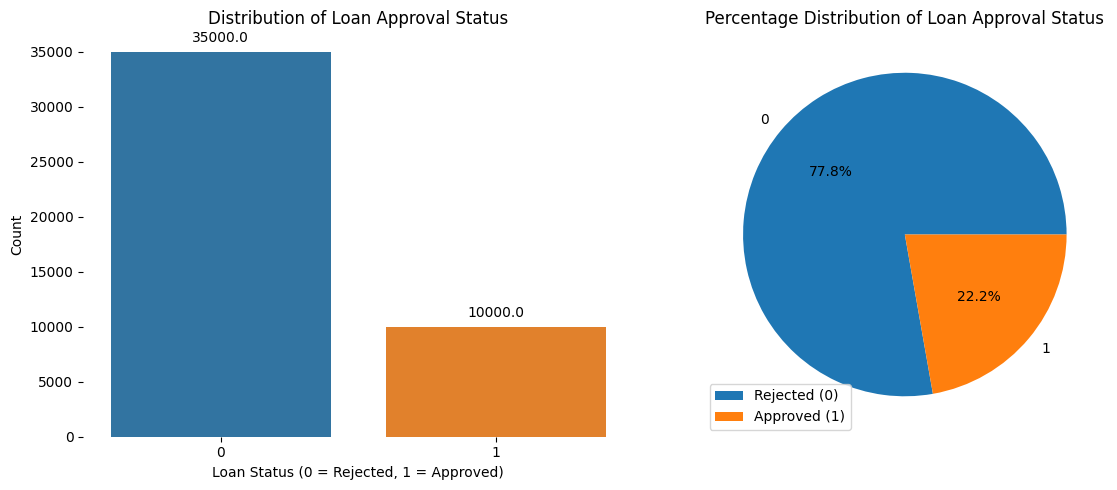

In [112]:
# Create subplots for loan status visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Count the occurrences of each loan status
loan_status_counts = df['loan_status'].value_counts()

# Bar plot for loan status distribution
sns.barplot(x=loan_status_counts.index, y=loan_status_counts, ax=axes[0], palette='tab10')
print(loan_status_counts.index )
axes[0].set_title('Distribution of Loan Approval Status')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Loan Status (0 = Rejected, 1 = Approved)')

# Annotate bar plot with counts 
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', 
                     xytext=(0, 10), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Pie chart for percentage distribution of loan status
loan_status_percentage = loan_status_counts / loan_status_counts.sum() * 100
axes[1].pie(loan_status_percentage, labels=loan_status_percentage.index, autopct='%1.1f%%', 
            colors=sns.color_palette('tab10'))
axes[1].set_title('Percentage Distribution of Loan Approval Status')
plt.legend(['Rejected (0)', 'Approved (1)'])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

From the visualisations above, we can see that there are a higher amount of individuals who were rejected for their loan compared to those that were accepted. This is important as we can take into account the class imbalance when building the predictive models.

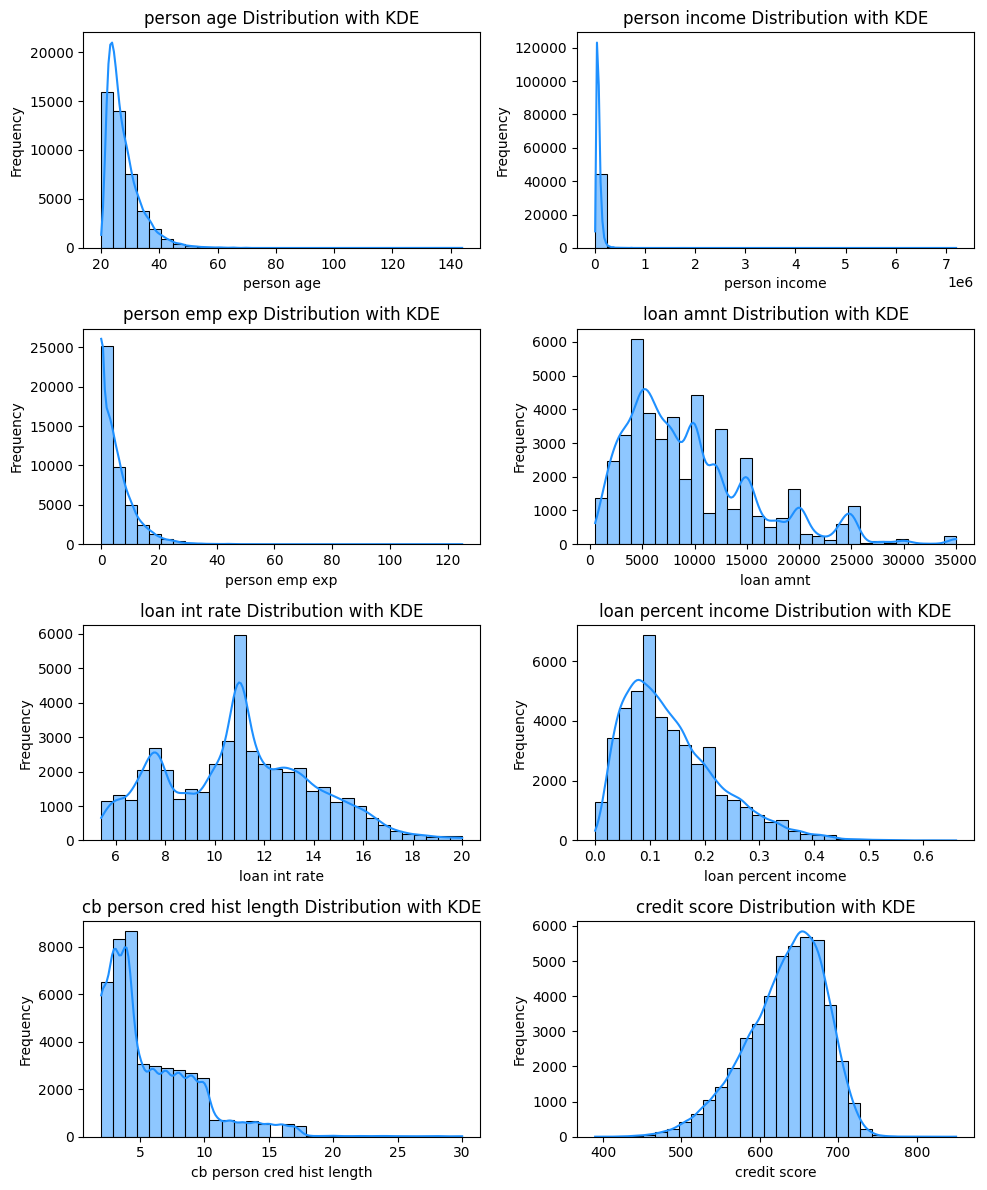

In [113]:


def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))  
    
    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)  
        sns.histplot(data[column], kde=True, bins=30, color='dodgerblue')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

univariate_analysis(df, columns_to_analyze)

Person Age:

The age distribution is slightly right-skewed, with most individuals in the dataset being between 20 and 40 years old.
The presence of a KDE (Kernel Density Estimate) helps smooth out the distribution, making it easier to visualize common age ranges.

Person Income:

The income distribution is highly right-skewed, with a large portion of incomes clustered at lower values.
Some very high income values are present, indicating potential outliers that could affect model performance if left unaddressed.

Person Employment Experience:

The majority of individuals have fewer than 10 years of experience, with a rapid decline in frequency as years increase.
A few instances show very high values, likely outliers, which could skew the analysis if not addressed.

Loan Amount:

The loan amounts are concentrated at lower values, indicating that most applicants are requesting smaller loans.
The distribution gradually tapers off, with a few applicants requesting high loan amounts.

Loan Interest Rate:

Interest rates are mostly clustered around 10% to 15%, which aligns with typical loan rates.
There’s a notable density between 5% and 10% as well, possibly indicating applicants with lower-risk profiles.

Loan Percent Income:

This distribution shows that most loan amounts are a small percentage of the applicant’s income, often less than 20%.
A few cases have a higher percentage, suggesting higher risk or lower-income applicants relative to their loan amounts.

Credit History Length:

The credit history length peaks at around 3 to 5 years, with fewer individuals having a credit history over 10 years.
This pattern can reflect a younger demographic or individuals newer to credit systems.
Credit Score:

Credit scores are distributed normally around the mid-range (600-700).
The distribution tails off near 850. 

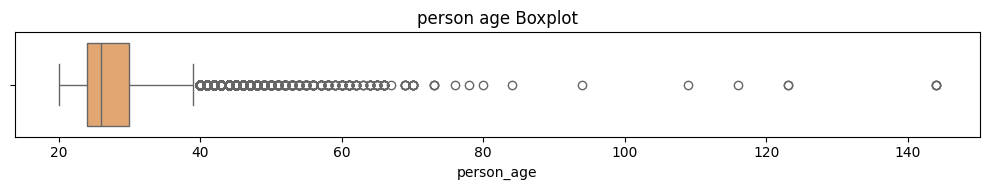


Summary Statistics for person age:
 count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64


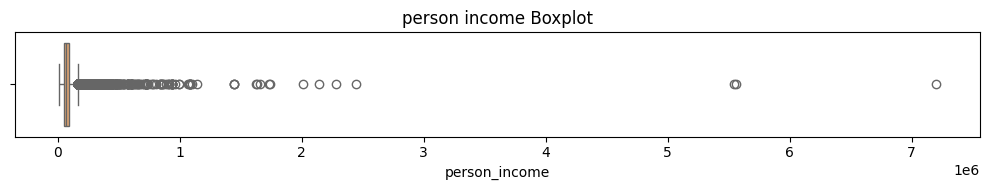


Summary Statistics for person income:
 count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64


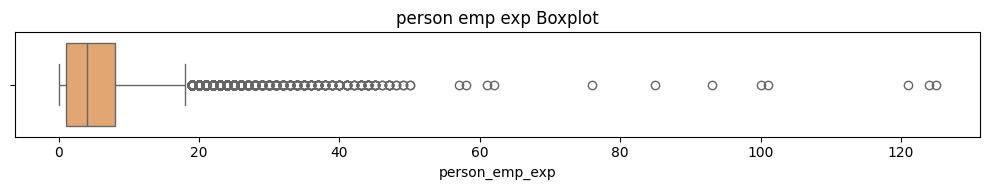


Summary Statistics for person emp exp:
 count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64


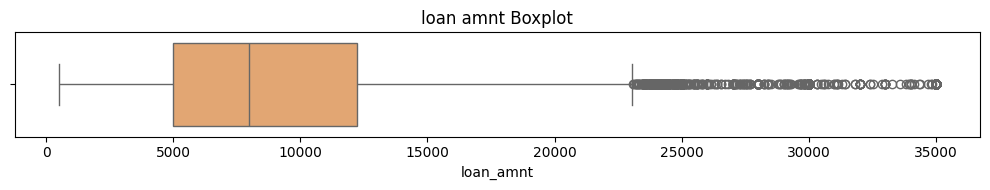


Summary Statistics for loan amnt:
 count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64


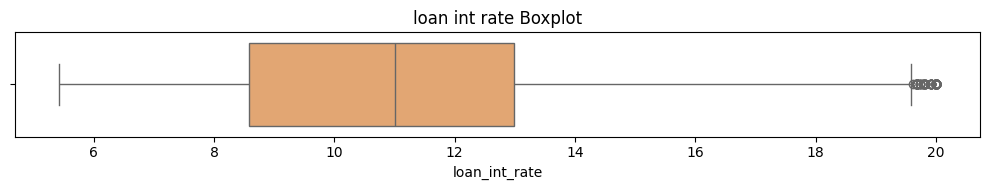


Summary Statistics for loan int rate:
 count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


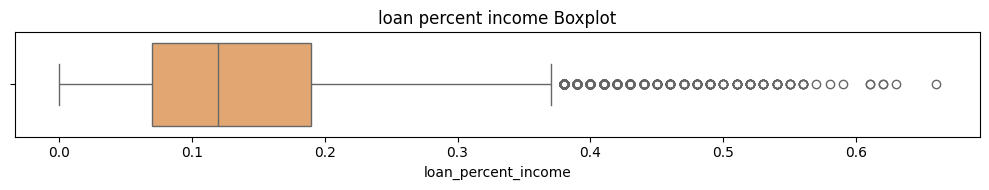


Summary Statistics for loan percent income:
 count    45000.000000
mean         0.139725
std          0.087212
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64


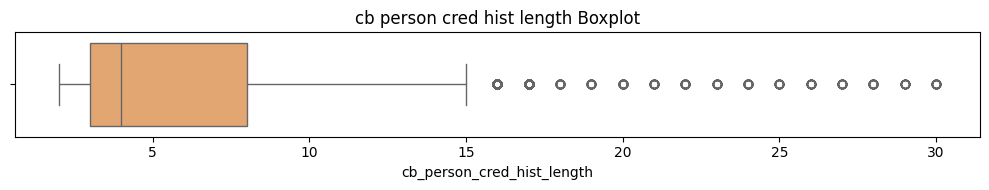


Summary Statistics for cb person cred hist length:
 count    45000.000000
mean         5.867489
std          3.879702
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


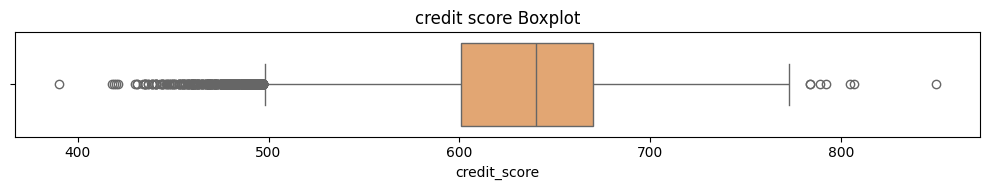


Summary Statistics for credit score:
 count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64


In [114]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    sns.boxplot(x=data[column], color='sandybrown')
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

Insights:

Person Age:

Ages range from 20 to 144, with the median age at 26. The high maximum value suggests a few outliers.
The interquartile range (IQR) is fairly narrow, with most values between 24 and 30.
Person Income:

The income distribution has a significant range, from 8,000 to over 7.2 million, with a median around 67,048.
The high maximum value indicates extreme outliers, which could potentially skew analyses and models.

Person Employment Experience:

Most values fall below 10 years, with the median at 4 years.
A maximum of 125 years is unusual, indicating outliers or data anomalies.

Loan Amount:

Loan amounts vary from 500 to 35,000, with a median of 8,000.
The distribution suggests a broad spread, with some applicants requesting higher amounts near the upper limit.

Loan Interest Rate:

Interest rates range from 5.42% to 20%, with a median rate of 11.01%.
Most rates cluster within the IQR (8.59% to 12.99%), which is typical for loan interest rates.
Loan Percent Income:

This metric ranges from 0 to 0.66, with a median of 0.12, suggesting that most loans are less than 20% of the borrower’s income.
The presence of high values near 0.66 may indicate loans that represent a higher financial burden for some applicants.

Credit History Length:

Credit history spans from 2 to 30 years, with a median of 4 years.
Most applicants have shorter credit histories, likely reflecting a younger demographic.

Credit Score:

Credit scores range from 390 to 850, with a median of 640.
The distribution appears fairly symmetric around the mean of 632, with most values falling within columns or address any anomalies.
def plot_categorical_dm

In [115]:
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, palette='muted')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

C:\Users\benna\AppData\Local\Temp\ipykernel_20644\1644664565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df, palette='muted')


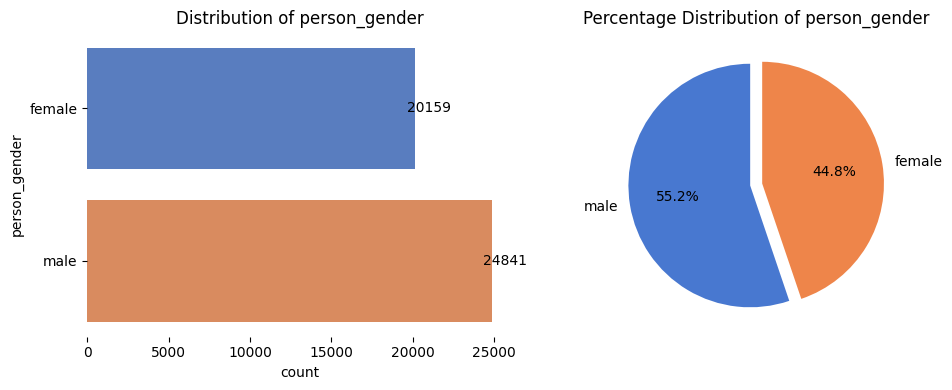

C:\Users\benna\AppData\Local\Temp\ipykernel_20644\1644664565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df, palette='muted')


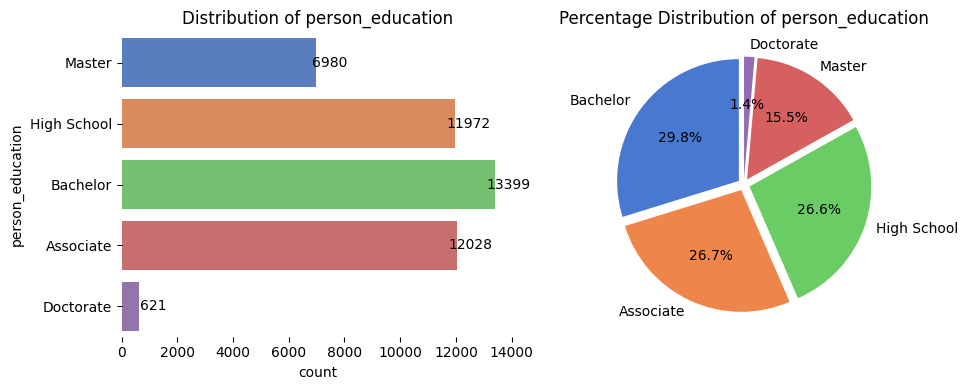

C:\Users\benna\AppData\Local\Temp\ipykernel_20644\1644664565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df, palette='muted')


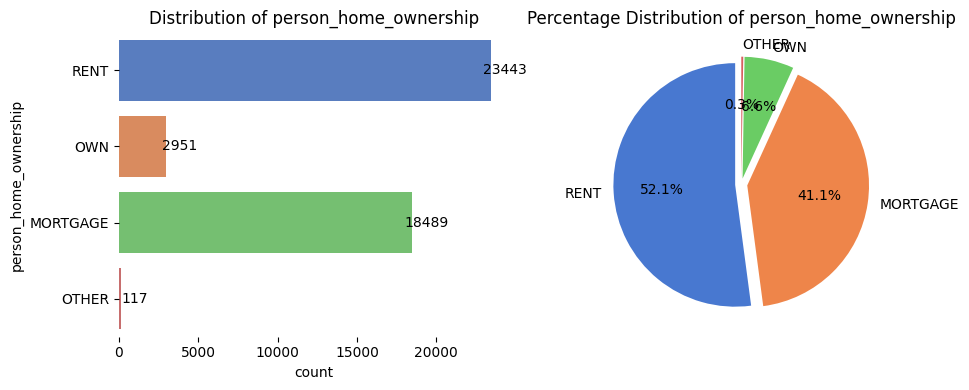

C:\Users\benna\AppData\Local\Temp\ipykernel_20644\1644664565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df, palette='muted')


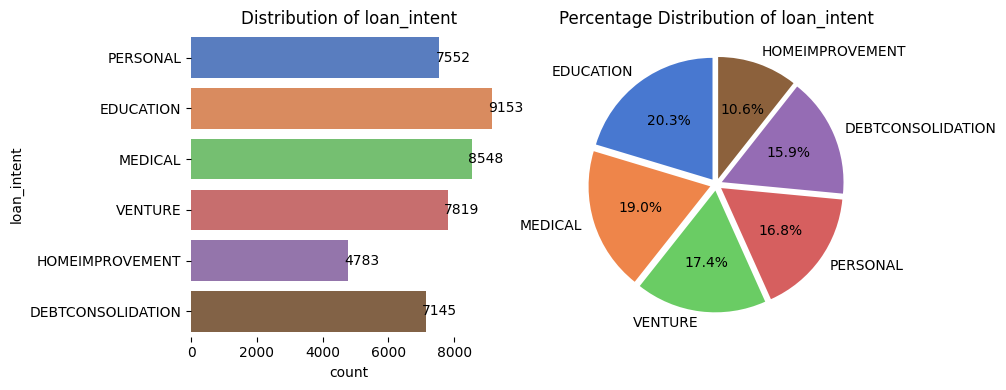

C:\Users\benna\AppData\Local\Temp\ipykernel_20644\1644664565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df, palette='muted')


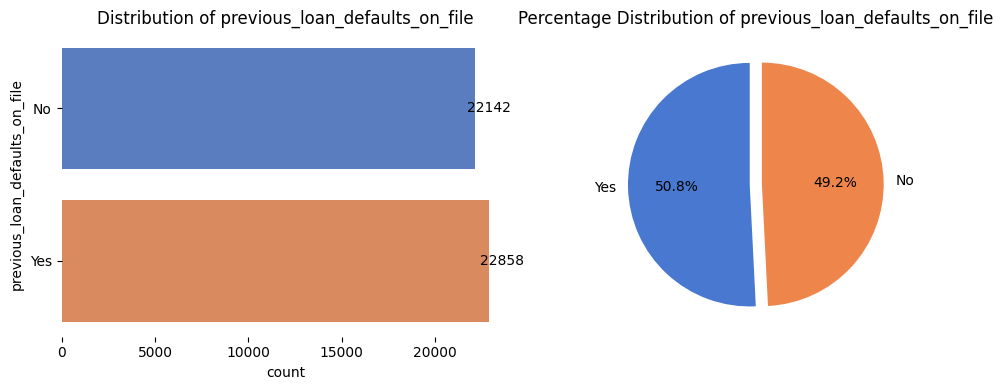

In [116]:
plot_categorical_distribution('person_gender')
plot_categorical_distribution('person_education')
plot_categorical_distribution('person_home_ownership')
plot_categorical_distribution('loan_intent')
plot_categorical_distribution('previous_loan_defaults_on_file')

Insights

Person Gender:
We can observe that there is a faily even distribution of males and females applying for the loans. But skews towards males slightly.

Person Education:
We can observe that the majority of individuals in the data have High School, Associate and Bachelor level of education. While fewer individuals have a Doctorate and Masters education level.
This feature influences the likelihood of the loan being rejected or approved as the education level may have a correlation between the person's income and credit score.

Person Home Ownership:
We can observe that individuals applying for loans a high majority have their homes on rent or mortage. While very few own their houses and individuals with "others" as their home statuses.
This affects the loan acceptability as home ownership usually dictates the person's financial stability.

Loan Intent:
Loan purposes are diverse, with common intents like personal use, debt consolidation, medical expenses, and education.
The distribution reveals common reasons for seeking loans, which may impact loan approval criteria depending on risk.

Previous Loan Defaults on File:
Most applicants have no record of previous loan defaults, though there is a significant portion with defaults.
This feature can strongly influence loan decisions, as past defaults indicate higher risk.




# 2. Data Exploration (Relationships)

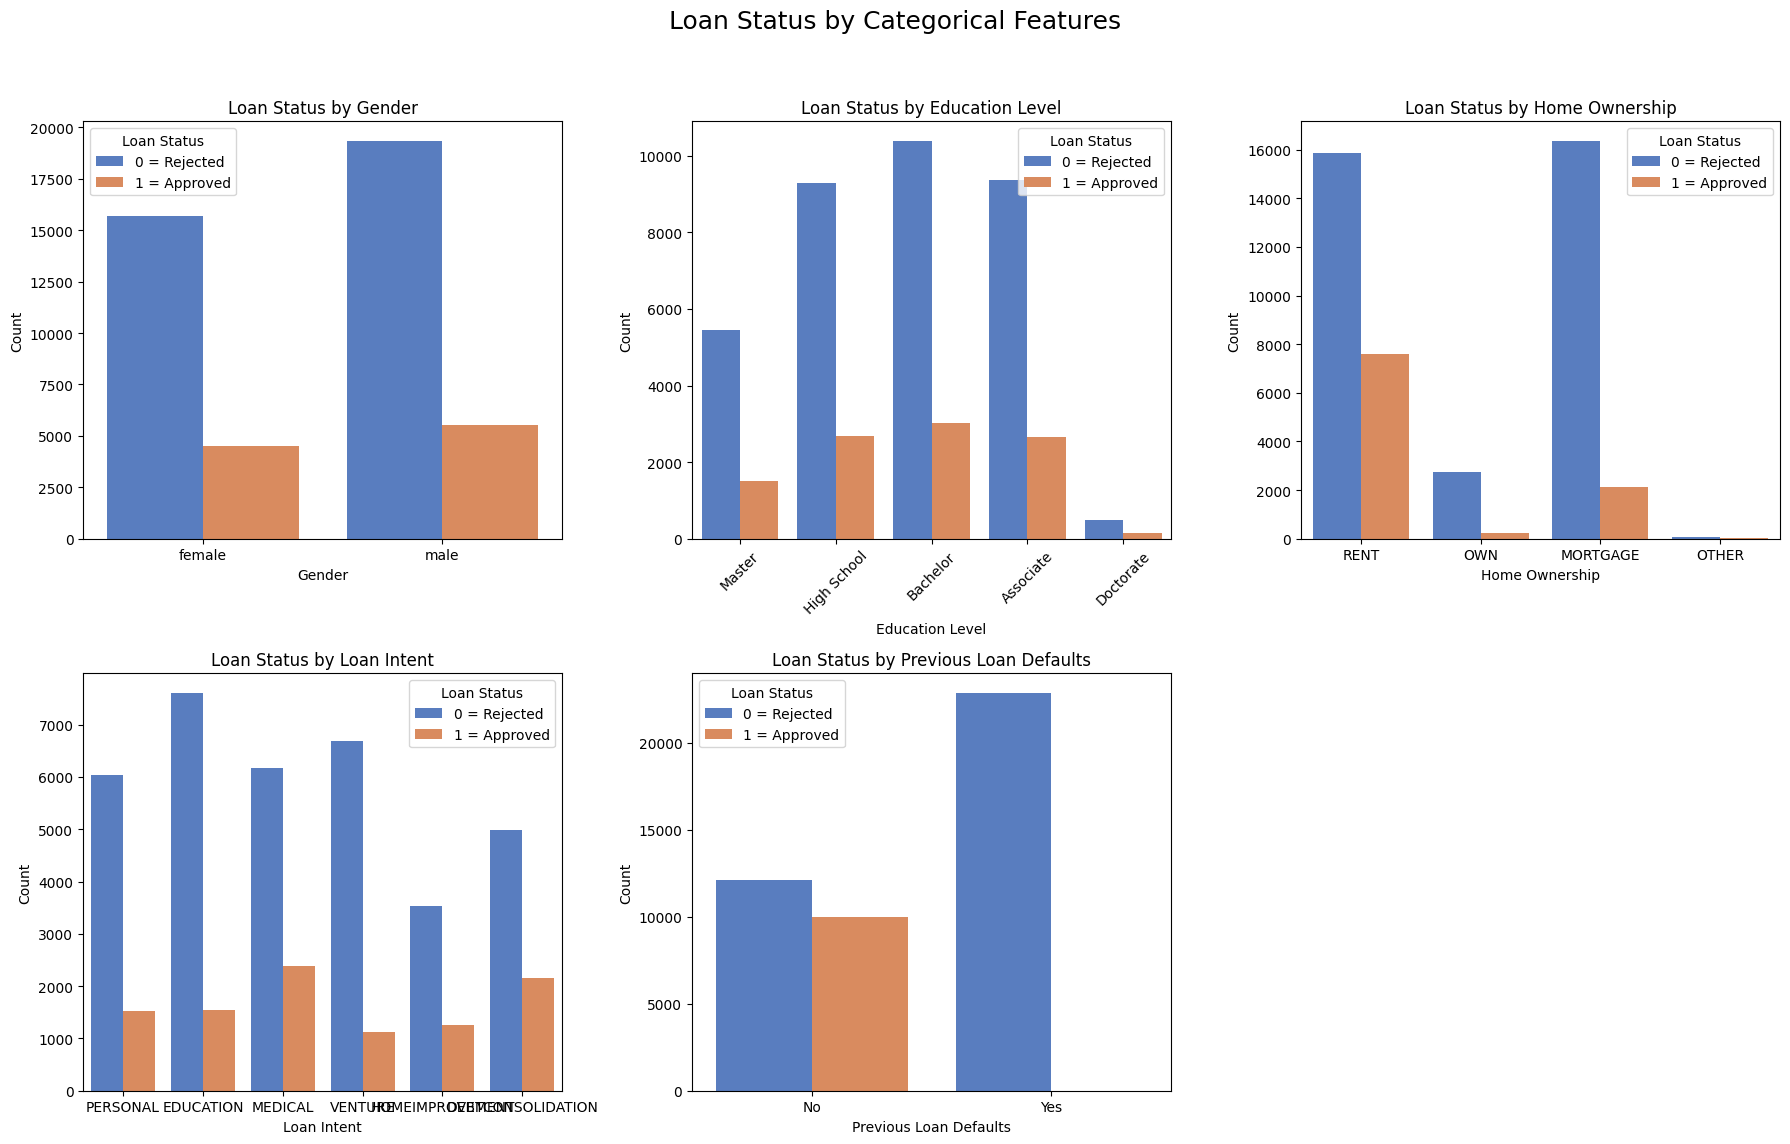

In [117]:
# Create subplots for loan status by categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Loan Status by Categorical Features", fontsize=18)

# Visualization for person_gender vs loan_status
sns.countplot(data=df, x='person_gender', hue='loan_status', ax=axes[0, 0], palette='muted')
axes[0, 0].set_title("Loan Status by Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for person_education vs loan_status
sns.countplot(data=df, x='person_education', hue='loan_status', ax=axes[0, 1], palette='muted')
axes[0, 1].set_title("Loan Status by Education Level")
axes[0, 1].set_xlabel("Education Level")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])
axes[0, 1].tick_params(axis='x', rotation=45)

# Visualization for person_home_ownership vs loan_status
sns.countplot(data=df, x='person_home_ownership', hue='loan_status', ax=axes[0, 2], palette='muted')
axes[0, 2].set_title("Loan Status by Home Ownership")
axes[0, 2].set_xlabel("Home Ownership")
axes[0, 2].set_ylabel("Count")
axes[0, 2].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for loan_intent vs loan_status
sns.countplot(data=df, x='loan_intent', hue='loan_status', ax=axes[1, 0], palette='muted')
axes[1, 0].set_title("Loan Status by Loan Intent")
axes[1, 0].set_xlabel("Loan Intent")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for previous_loan_defaults_on_file vs loan_status
sns.countplot(data=df, x='previous_loan_defaults_on_file', hue='loan_status', ax=axes[1, 1], palette='muted')
axes[1, 1].set_title("Loan Status by Previous Loan Defaults")
axes[1, 1].set_xlabel("Previous Loan Defaults")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Hide the last subplot (if not needed)
fig.delaxes(axes[1][2])

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Insights based on the relationship between loan status and various categorical features:

Loan Status by Gender:
Loan approvals and rejections are fairly balanced across genders, though there may be slight variations.
This balance suggests that gender may not be a strong determining factor in loan approval outcomes.


Loan Status by Education Level:
Applicants with higher education levels (Bachelor's, Associate's, etc.) seem to have a higher count of loan approvals compared to those with lower education levels.
Education level could be a predictor of loan approval, as it often correlates with higher income and creditworthiness.

Loan Status by Home Ownership:
Individuals who rent appear to have a higher rate of loan rejections compared to those with mortgages or who own homes.
This trend might indicate that home ownership status is considered a risk factor, as renters may have less financial stability than homeowners.

Loan Status by Loan Intent:
Certain loan purposes, like debt consolidation and personal loans, show more loan rejections than approvals.
Conversely, loan intents for ventures and education appear to have relatively balanced approval and rejection rates, possibly due to the perceived potential for income generation or improvement.

Loan Status by Previous Loan Defaults:
Applicants with a history of previous loan defaults have a significantly higher rejection rate compared to those without defaults.
This feature likely has a strong influence on loan status, as past defaults signal any specific analysis.

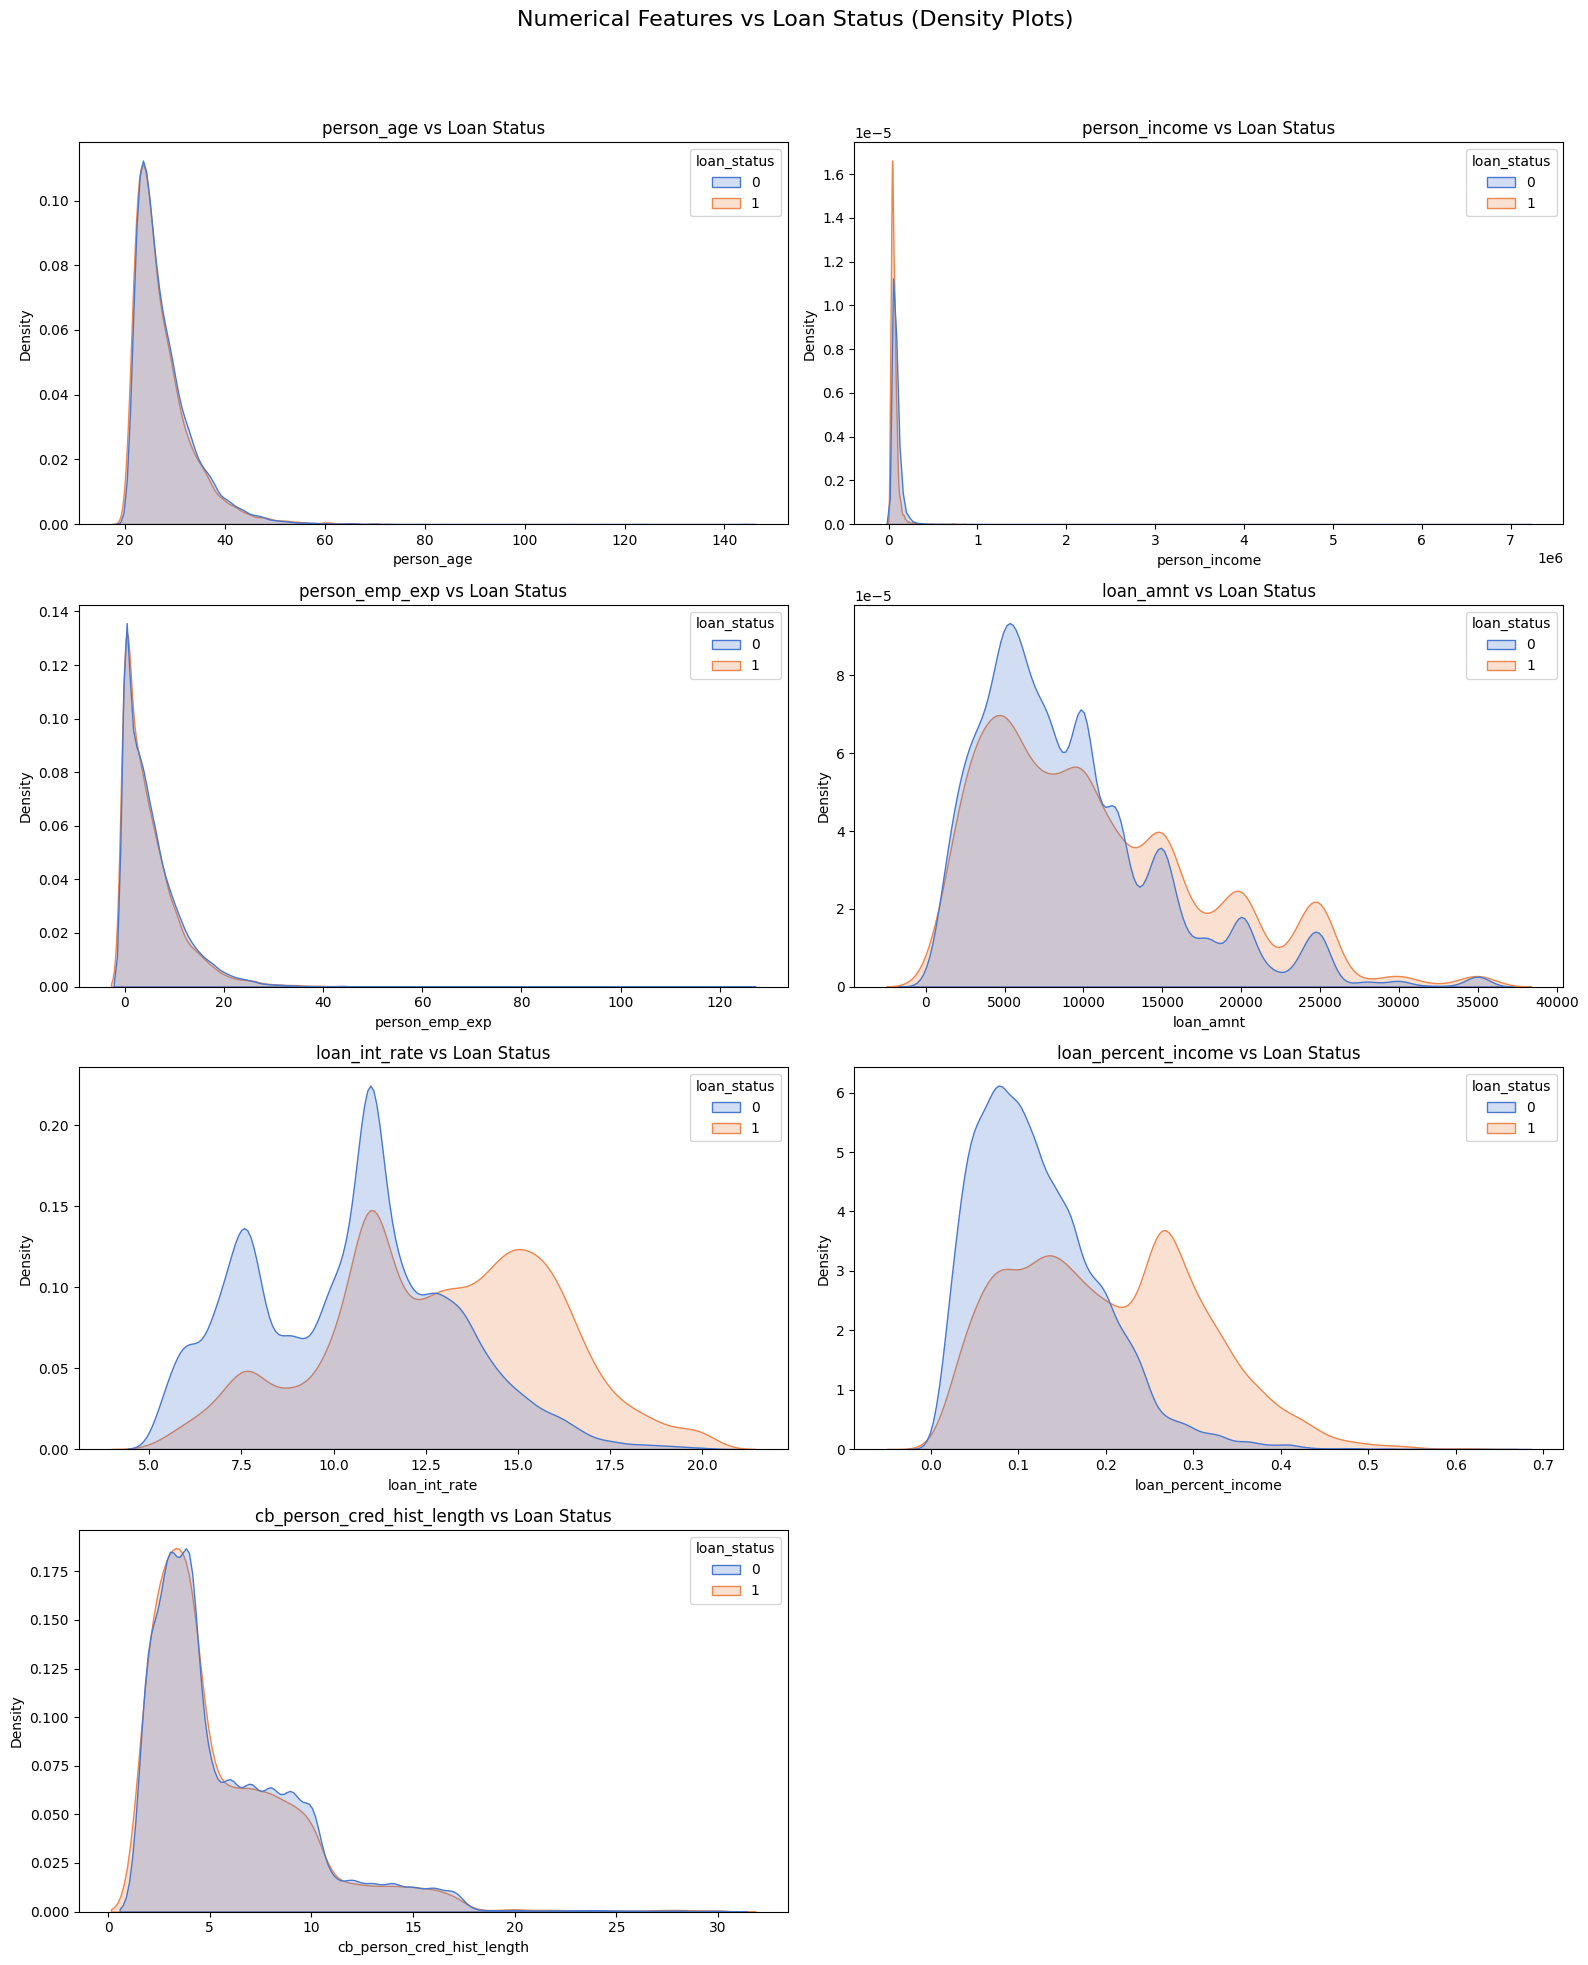

In [118]:
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Numerical Features vs Loan Status (Density Plots)', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=col, hue='loan_status', ax=axes[i//2, i%2], fill=True, common_norm=False, palette='muted')
    axes[i//2, i%2].set_title(f'{col} vs Loan Status')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Density')

fig.delaxes(axes[3, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Insights from the boxplots of numerical features by loan status:

Person Age:
Approved loans tend to have a slightly younger median age, though the difference is subtle.
The distribution range is wider for rejected loans, with outliers at the upper end, possibly indicating higher age as a minor risk factor.

Person Income:
Approved loans generally correspond to applicants with higher incomes.
The median income is notably higher for approved loans, and there are many high-income outliers for approved applications, suggesting that income positively impacts approval.

Person Employment Experience:
Higher employment experience shows a slight correlation with loan approval, as approved applicants have a higher median experience.
However, both approved and rejected groups share a wide range, implying other factors might play a stronger role.

Loan Amount:
Loan amounts are relatively similar across approved and rejected groups, though slightly higher medians are observed in rejected loans.
This may suggest that larger loans are slightly more prone to rejection, but the difference is not substantial.

Loan Interest Rate:
Approved loans tend to have slightly lower interest rates on average compared to rejected loans.
This difference aligns with a higher perceived risk for applicants with higher interest rates, possibly due to lower credit scores.


Loan Percent Income:
Applicants with approved loans generally have lower loan-to-income ratios, indicating that loans making up a smaller percentage of income are more likely to be approved.
High loan-to-income ratios in rejected loans suggest that lenders are cautious when loan amounts represent a significant portion of income.

Credit History Length:
Longer credit histories are observed for approved loans, suggesting that applicants with established credit histories have a higher likelihood of approval.
The trend reflects lenders’ preference for borrowers with more credit experience.

Credit Score:
Approved loans are associated with higher credit scores, as expected.
This significant difference highlights credit score as a strong predictor of loan approval, with higher scores reflecting lower perceived risk.

In [119]:
np.isinf(df[numerical_columns]).sum()

person_age                    0
person_income                 0
person_emp_exp                0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
credit_score                  0
dtype: int64

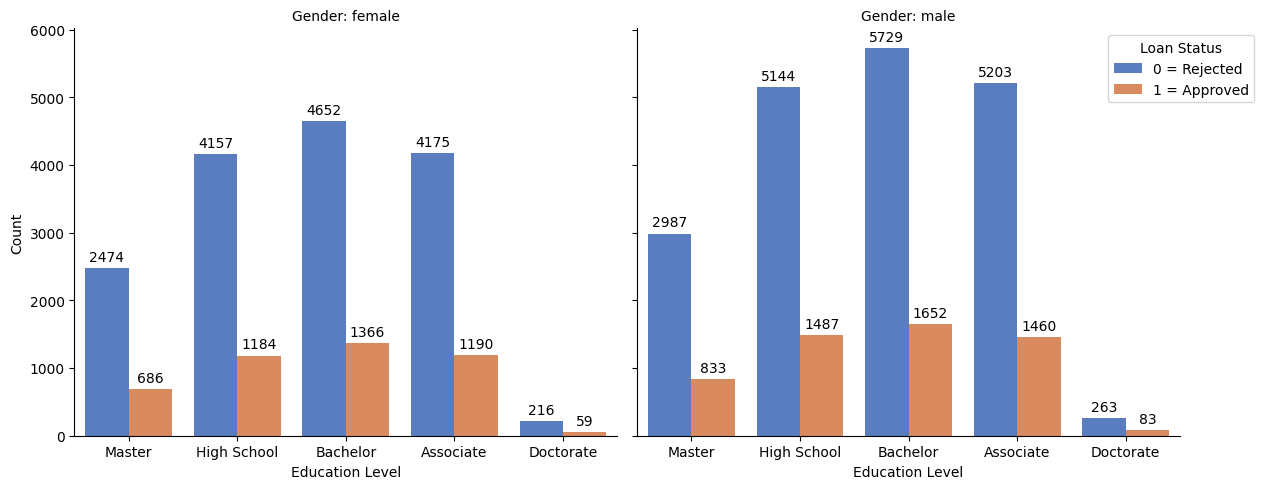

In [120]:
# Create the catplot for person_education vs loan_status by person_gender
g = sns.catplot(
    data=df,
    x='person_education', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Education Level", "Count")
g.set_titles("Gender: {col_name}")

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

Insights for education level vs. loan status by gender:
 
Gender Comparison:

Both male and female applicants show similar trends in loan approval and rejection rates across education levels, though there may be slight variations.
Education Level and Loan Status:

For both genders, applicants with higher education levels (e.g., Bachelor's, Master's) tend to have higher loan approval counts.
Applicants with only a high school education appear to have more rejections than approvals, indicating that education level might influence loan outcomes, likely due to its association with income stability.
Approval Pattern by Gender:

Among both genders, there is a noticeable trend where more educated applicants (e.g., those with Master’s and Bachelor’s degrees) are more likely to get approved, which suggests that education level is a positive indicator for loan approval, possibly reflecting a more stable financial profile.
Rejected Applications:

The rejection rate is higher for applicants with lower educational attainment, which might point to a perceived higher risk by lenders.
These patterns suggest that education level is an influential factor in loan approval decisions, and it interacts similarly across both genders.

C:\Users\benna\AppData\Local\Temp\ipykernel_20644\3638622325.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\benna\AppData\Local\Temp\ipykernel_20644\3638622325.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


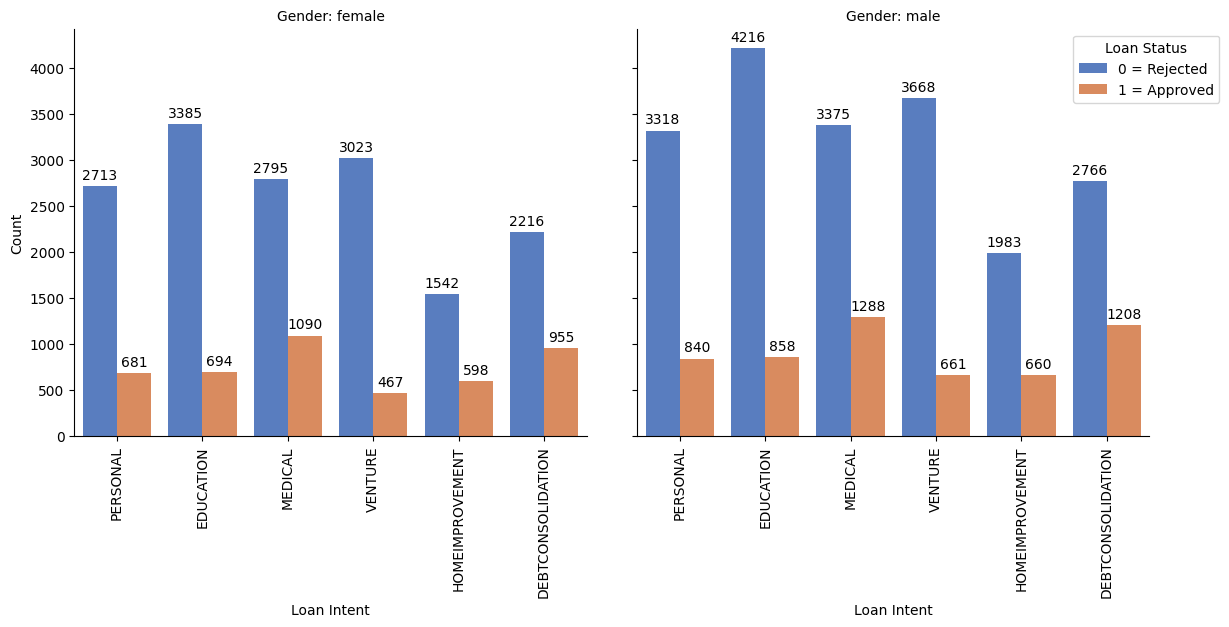

In [121]:
g = sns.catplot(
    data=df,
    x='loan_intent', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Loan Intent", "Count")
g.set_titles("Gender: {col_name}")

# Rotate x-axis labels by 90 degrees
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

Insights for education level vs. loan status by gender:

Gender Comparison:

Both male and female applicants show similar trends in loan approval and rejection rates across education levels, though there may be slight variations.
Education Level and Loan Status:

For both genders, applicants with higher education levels (e.g., Bachelor's, Master's) tend to have higher loan approval counts.
Applicants with only a high school education appear to have more rejections than approvals, indicating that education level might influence loan outcomes, likely due to its association with income stability.
Approval Pattern by Gender:

Among both genders, there is a noticeable trend where more educated applicants (e.g., those with Master’s and Bachelor’s degrees) are more likely to get approved, which suggests that education level is a positive indicator for loan approval, possibly reflecting a more stable financial profile.
Rejected Applications:

The rejection rate is higher for applicants with lower educational attainment, which might point to a perceived higher risk by lenders.
These patterns suggest that education level is an influential factor in loan approval decisions, and it interacts similarly across both genders.

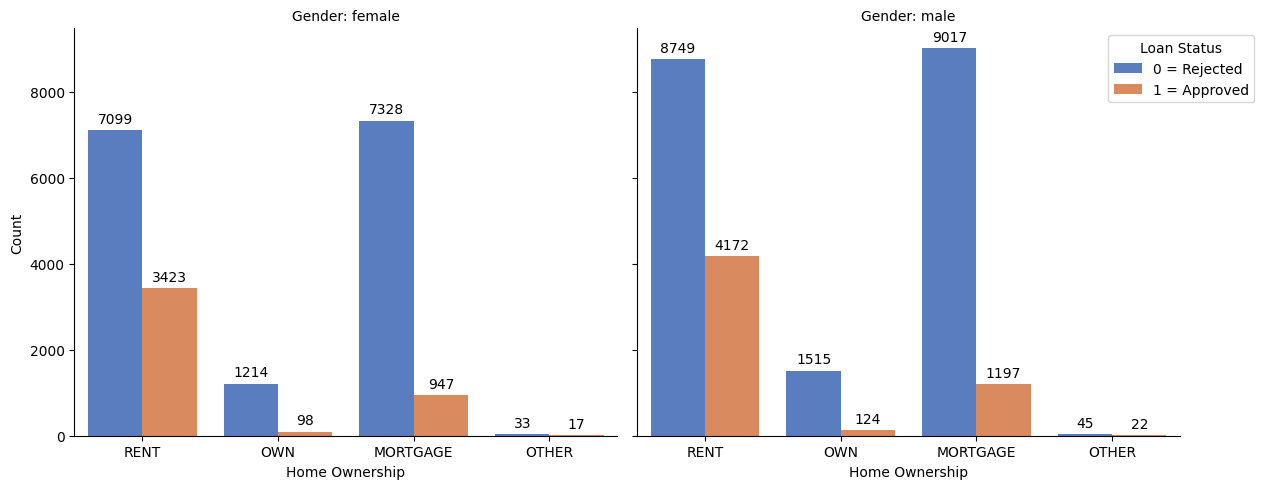

In [122]:
# Create the catplot for person_home_ownership vs loan_status by person_gender
g = sns.catplot(
    data=df,
    x='person_home_ownership', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Home Ownership", "Count")
g.set_titles("Gender: {col_name}")

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

Insights for home ownership vs. loan status by gender:


Home Ownership and Loan Status:
Both male and female applicants with a mortgage or who own their home have higher counts of approved loans compared to those who rent or are categorized under “other.”
Renting is associated with a higher rejection rate, possibly indicating that renters may be perceived as having a higher credit risk.

Gender-Specific Patterns:
While both genders show similar trends, males who own homes or have a mortgage appear to have a slightly higher number of loan approvals compared to females with similar homeownership status.
In both genders, applicants under the “other” category have relatively fewer approvals, suggesting that homeownership stability (owning or mortgaging) is a positive factor for loan approval.

Rejected Applications:
Among renters, the rejection rate is notably high across both genders, which could imply that renters might lack certain financial security or creditworthiness that homeowners possess.

Homeownership as a Stability Indicator:
The data suggests that applicants who own or have a mortgage are viewed more favorably, likely due to perceived financial stability, which positively influences loan approval chances.
These observations indicate that homeownership is a significant predictor of loan approval, reflecting the applicant's financial stability, and is consistent across both genders.

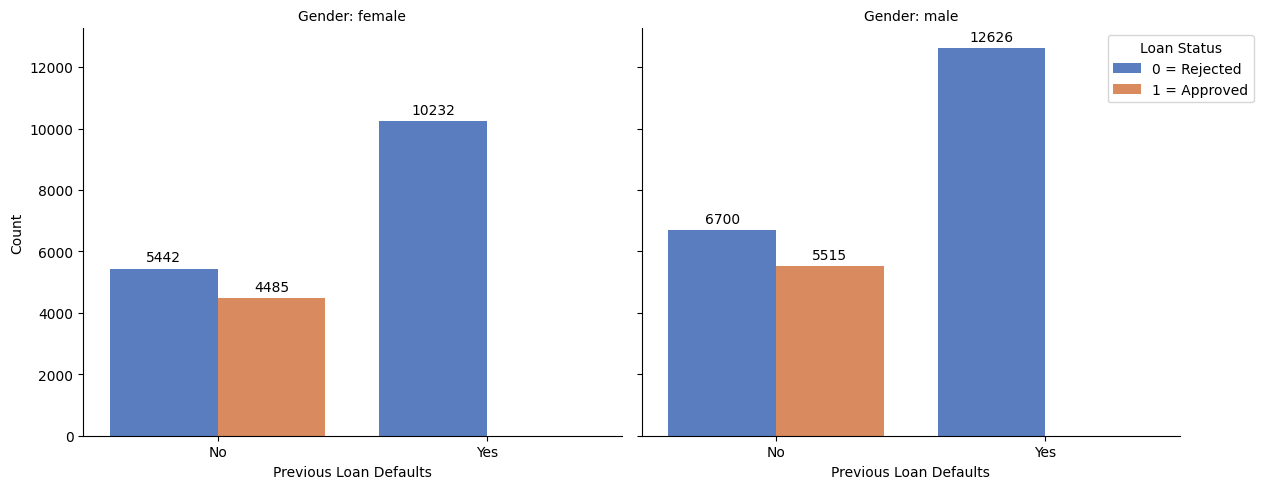

In [123]:
# Create the catplot for previous_loan_defaults_on_file vs loan_status by person_gender
g = sns.catplot(
    data=df,
    x='previous_loan_defaults_on_file', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Previous Loan Defaults", "Count")
g.set_titles("Gender: {col_name}")

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

Insights for previous loan defaults vs. loan status by gender:


Impact of Previous Defaults on Loan Approval:
Applicants with previous loan defaults have a significantly higher count of rejections for both genders, indicating that a history of loan defaults is a strong negative factor in loan approval decisions.
Those without previous loan defaults have noticeably more approvals, highlighting that a clean credit history is associated with higher approval rates.

Gender-Specific Observations:
Both male and female applicants with no prior defaults show similar approval and rejection patterns, suggesting that previous defaults affect loan decisions consistently across genders.
Among applicants with previous defaults, the rejection rate is overwhelmingly high for both genders, reinforcing the importance lenders place on a clean credit history.

High Rejection for Defaults:
The high rejection rate for applicants with prior defaults suggests that lenders view these individuals as higher risk, irrespective of other factors, which strongly influences loan status outcomes.
These patterns underscore that previous loan defaults are a crucial factor in loan approval, and maintaining a clear credit record is beneficial for both genders when seeking loan approvals.

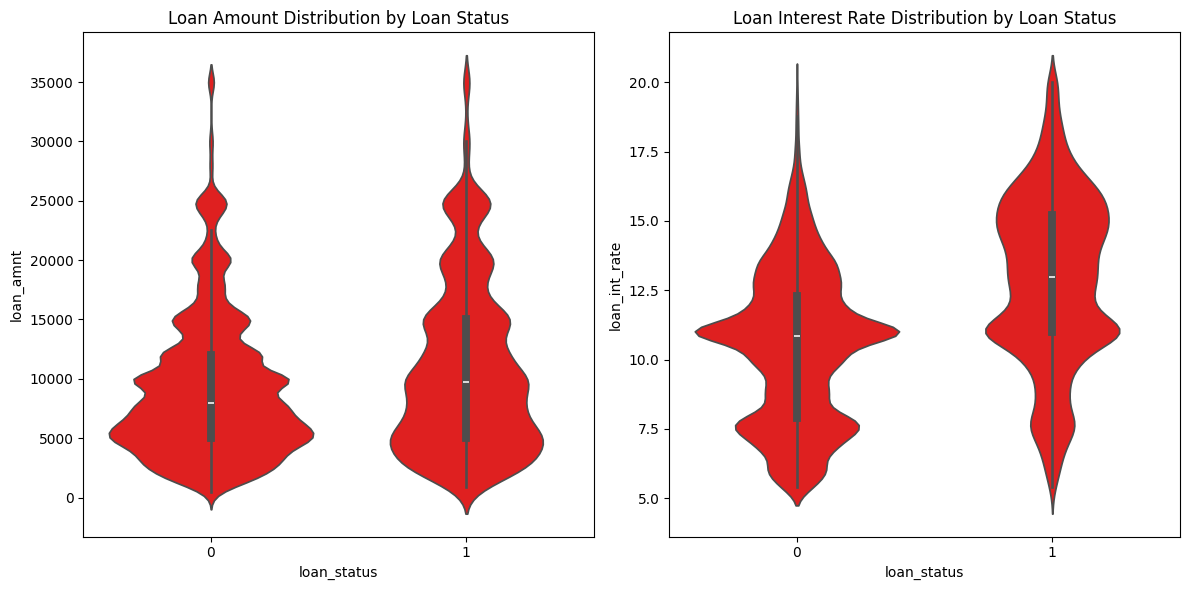

In [124]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='loan_status', y='loan_amnt', data=df,color="red")
plt.title('Loan Amount Distribution by Loan Status')

plt.subplot(1, 2, 2)
sns.violinplot(x='loan_status', y='loan_int_rate', data=df,color="red")
plt.title('Loan Interest Rate Distribution by Loan Status')

plt.tight_layout()
plt.show()

Insights for loan amount and loan interest rate by loan status:


Loan Amount Distribution by Loan Status:
The distribution of loan amounts differs between approved and rejected loans.
Approved loans show a broader spread across different loan amounts, with a central tendency around mid-range amounts.
Rejected loans tend to cluster at both low and high loan amounts, indicating that very small or large loan requests are more likely to be rejected.

Loan Interest Rate Distribution by Loan Status:
Loan interest rates are higher for rejected loans, with a central tendency around a higher rate compared to approved loans.
Approved loans have a narrower distribution with lower average interest rates, suggesting that lower-risk (lower-interest) loans have better chances of approval.

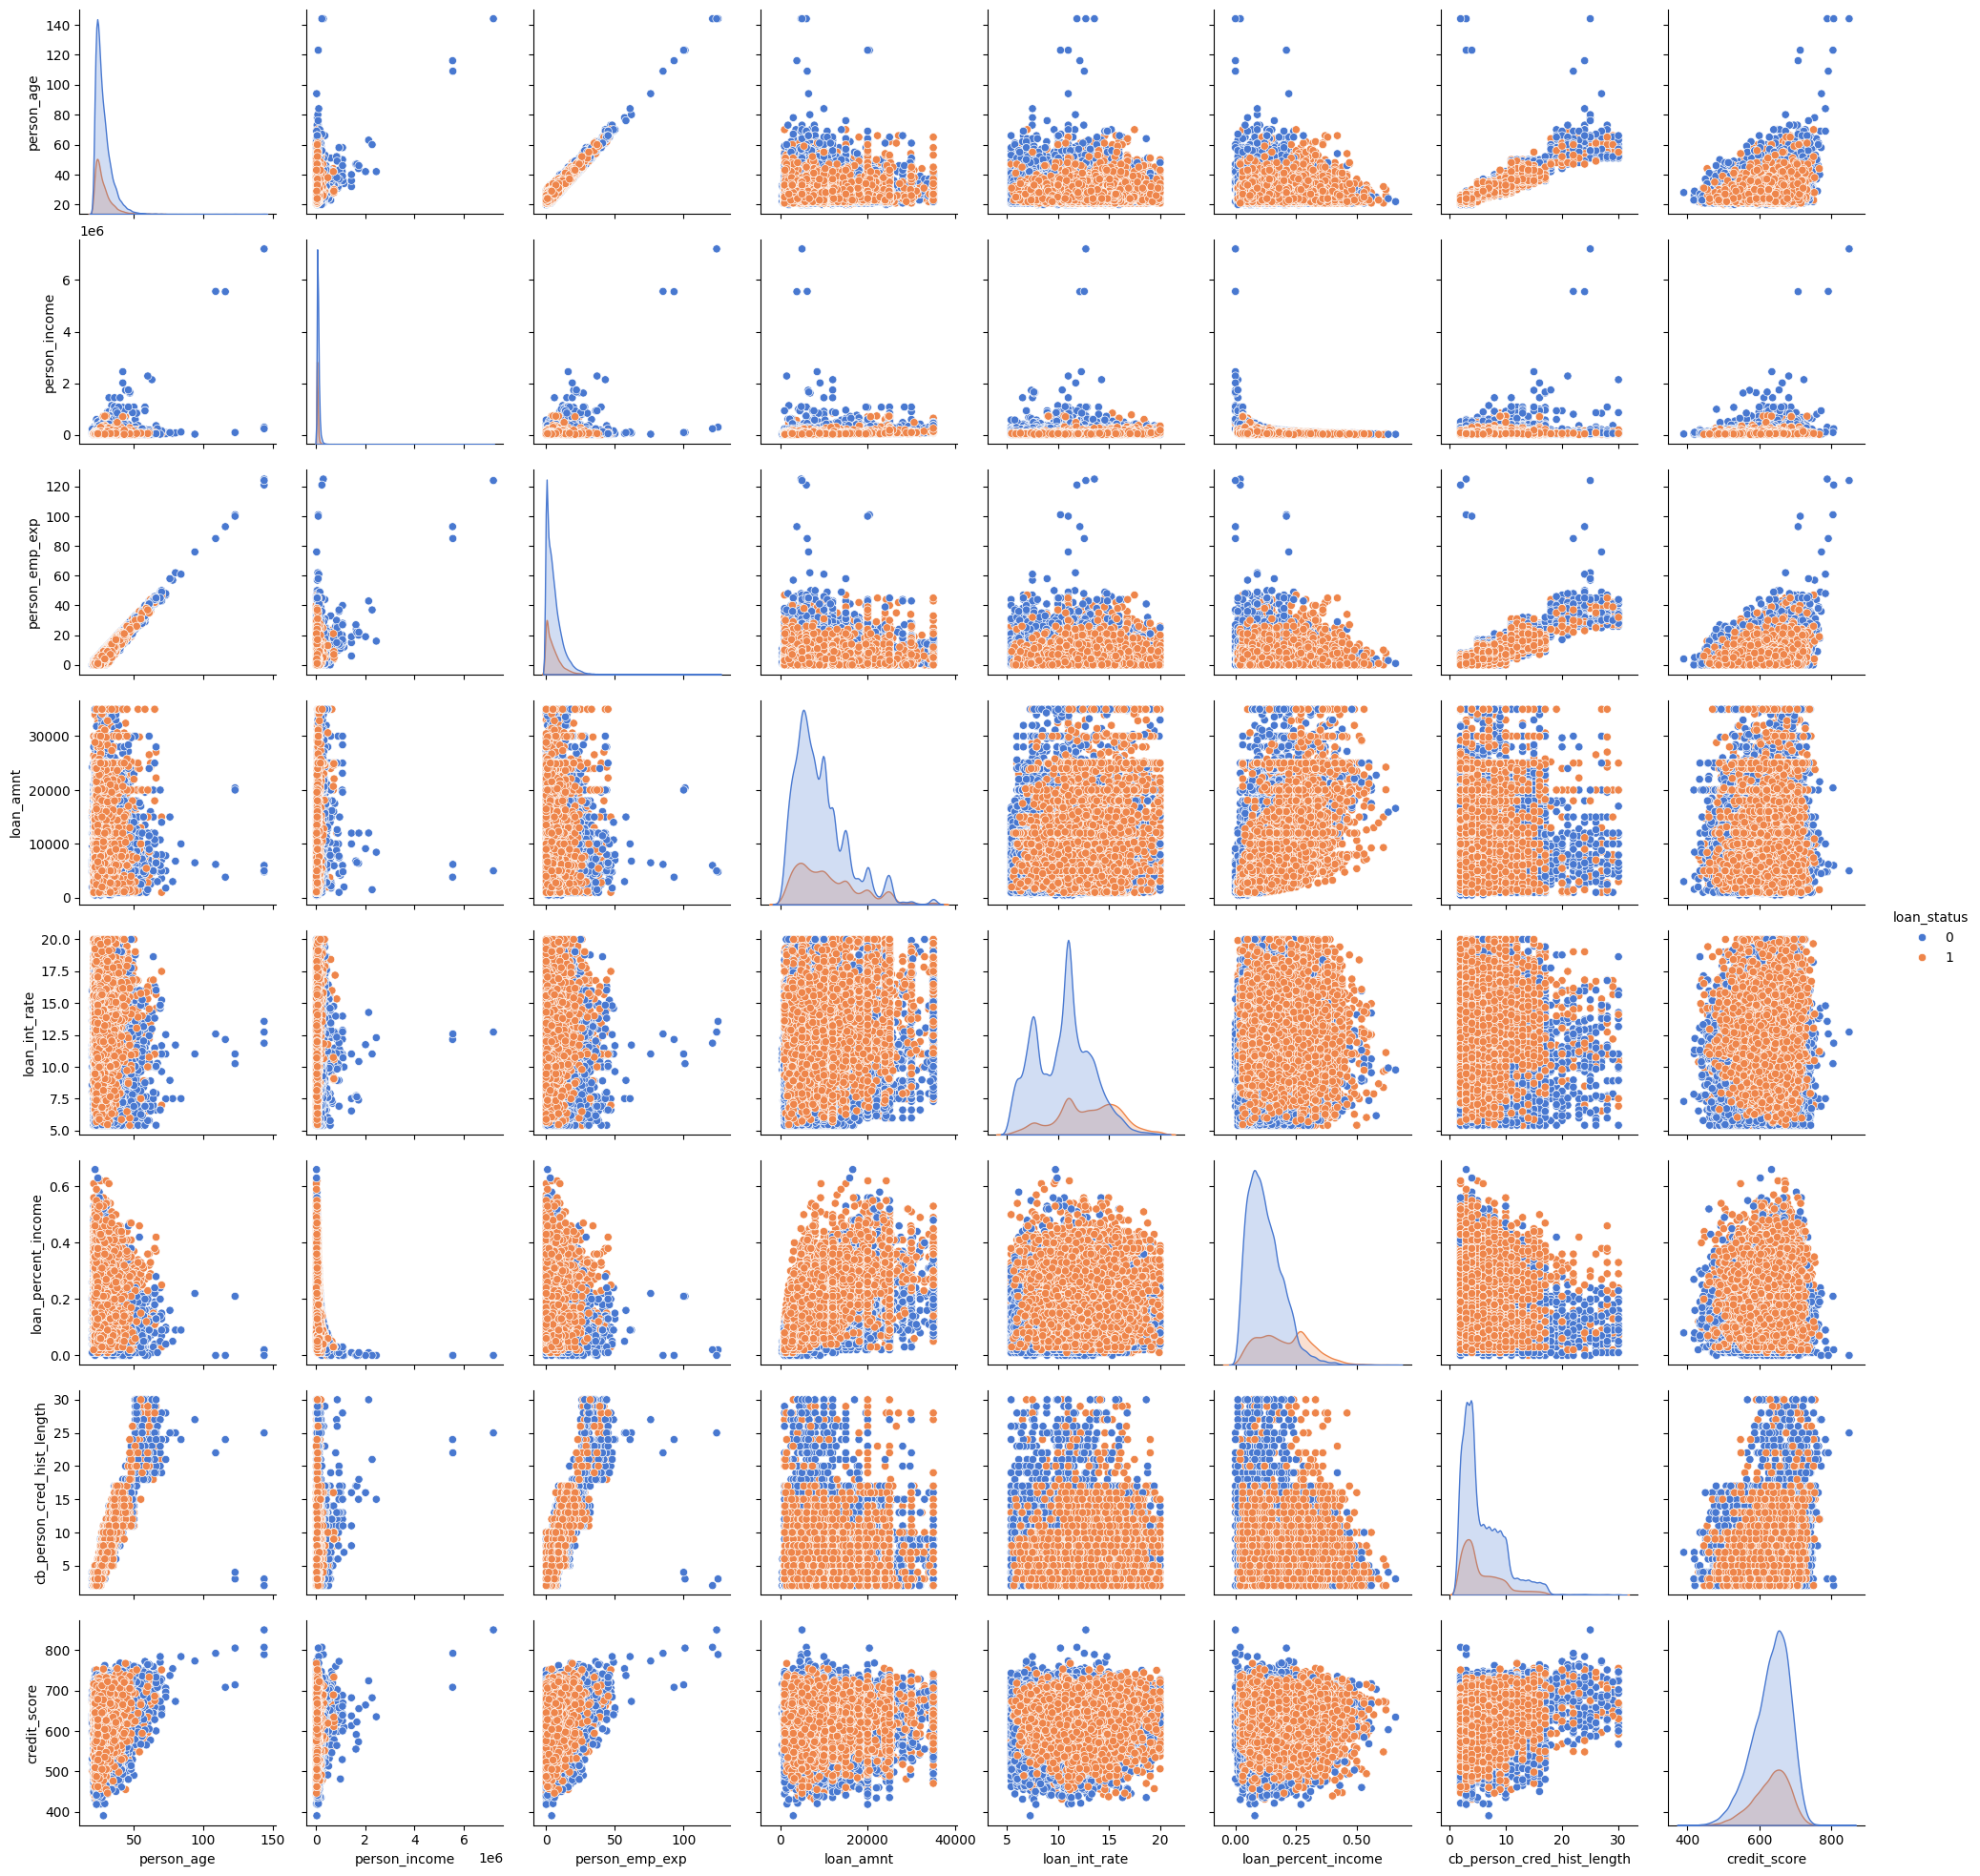

In [125]:
# Define numerical columns with target
numerical_columns_with_target = [
    'person_age', 
    'person_income', 
    'person_emp_exp', 
    'loan_amnt', 
    'loan_int_rate', 
    'loan_percent_income', 
    'cb_person_cred_hist_length', 
    'credit_score'
]

# Create pairplot of numerical features with loan_status as hue
sns.pairplot(df[numerical_columns_with_target + ['loan_status']], 
             hue='loan_status', 
             palette='muted'
            )
plt.show()

# 3. Data Preprocessing

## Preparing our data to be able to be used by the models

In [126]:
df.shape

(45000, 14)

In [127]:
# Binary Encoding for person_gender
df['person_gender'] = df['person_gender'].map({'female': 0, 'male': 1})
# Binary Encoding for previous_loan_defaults_on_file
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

# Ordinal Encoding for person_education (if applicable)
education_order = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 
                   'Master': 4, 'Doctorate': 5}
df['person_education'] = df['person_education'].map(education_order)

# One-Hot Encoding for person_home_ownership and loan_intent
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)



# Display the transformed DataFrame
print(df.head())

   person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0                 4        71948.0               0   
1        21.0              0                 1        12282.0               0   
2        25.0              0                 1        12438.0               3   
3        23.0              0                 3        79753.0               0   
4        24.0              1                 4        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  previous_loan_d

In [128]:
df.shape

(45000, 20)

The transformation applied to the dataset:

Binary Encoding:

person_gender is now represented as 0 (female) and 1 (male).
previous_loan_defaults_on_file is represented as 0 (No) and 1 (Yes).
Ordinal Encoding:

person_education has been mapped based on the level of education, with higher values indicating higher educational attainment (e.g., High School = 1, Doctorate = 5).
One-Hot Encoding:

New columns have been created for person_home_ownership and loan_intent, each representing a unique category (e.g., person_home_ownership_OWN, loan_intent_PERSONAL), with one category dropped to avoid multicollsformations.

In [129]:
# Replacing Outliers with Median
median_age = df['person_age'].median()
df['person_age'] = df['person_age'].apply(lambda x: median_age if x > 100 else x)

As seen when exploring the data, the maximum age in the dataset is 144, which is definetely an outlier as it defies the human lifespan. To handle this, we replace the outliers where the age is above 100, and replace them with the median age.

In [130]:
# Analyze the 'person_age' column
column = 'person_age'
title = column.replace('_', ' ')

# Display summary statistics for person_age
print(f'\nSummary Statistics for {title}:\n', df[column].describe())


Summary Statistics for person age:
 count    45000.000000
mean        27.748156
std          5.909318
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64


After replacing outliers with the median age:

The maximum age is now 94, which falls within a reasonable range for human age data.
The mean age (27.75) and standard deviation (5.91) have slightly decreased, suggesting a more compact age distribution.
Replacing extreme values with the median has helped to eliminate unrealistic values without removing any rows, preserving the dataset's integrity.
This approach retains a realistic spread in the person_age data, with the median remaining at 26.

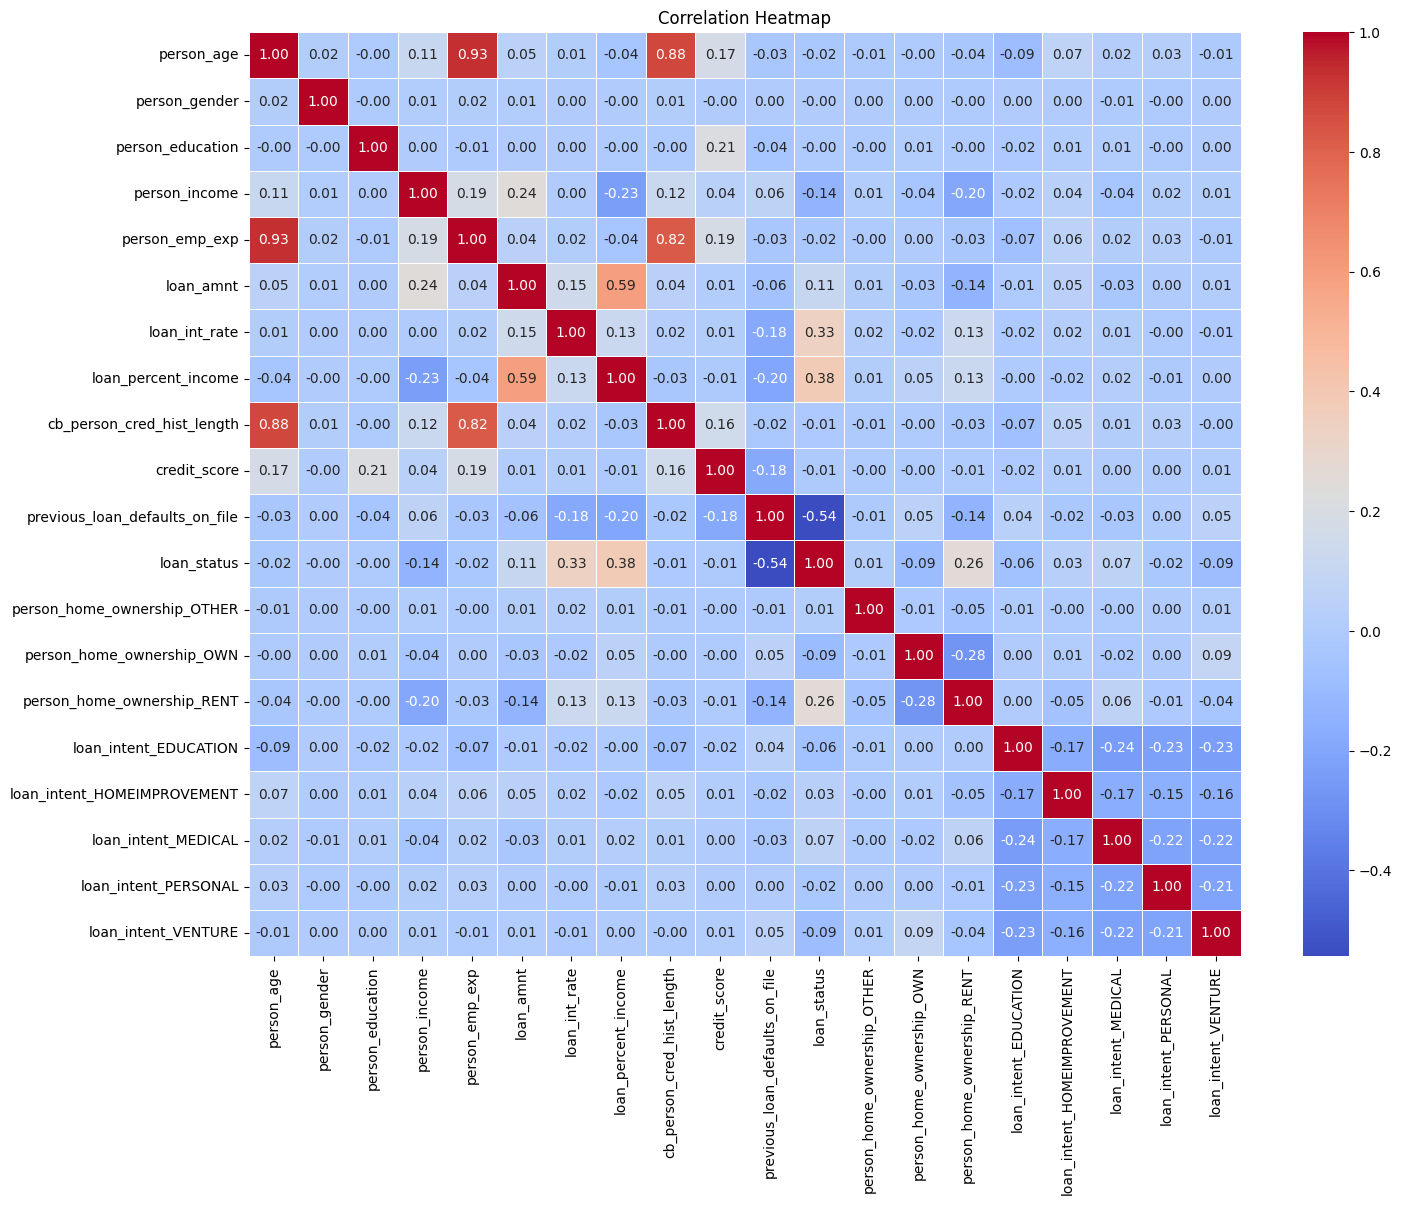

In [131]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

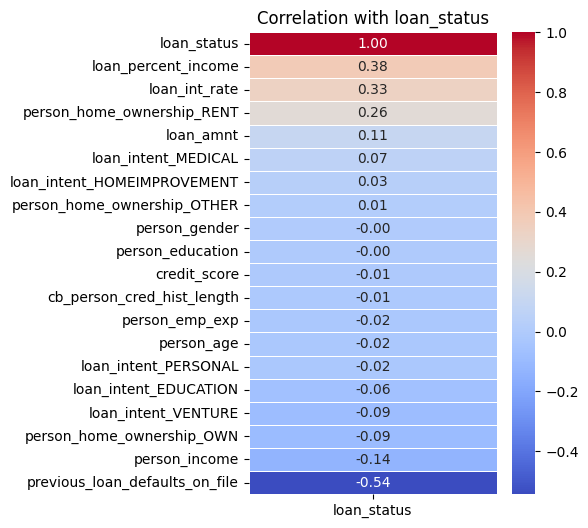

In [132]:
# Extract correlation values with respect to the target variable (loan_status)
target_variable = 'loan_status'
target_corr = corr_matrix[[target_variable]].sort_values(by=target_variable, ascending=False)

# Plotting the heatmap for correlation values with respect to the target variable
plt.figure(figsize=(4, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Correlation with {target_variable}')
plt.show()

Insights:

Positive Correlation with loan_status:

loan_percent_income (0.38): This is the strongest positive correlation with loan_status, suggesting that applicants with higher loan amounts relative to their income may have a higher likelihood of approval.

loan_int_rate (0.33): Higher interest rates are positively correlated with approval status, which may indicate that riskier applicants, or those with higher interest rates, are still often approved.

person_home_ownership_RENT (0.26): Renting status has a positive correlation, suggesting that renters might have slightly higher approval rates than other home ownership statuses.

Weak Correlation with loan_status:

loan_amnt (0.11): The loan amount has a weak positive correlation, indicating a slight tendency for higher loan amounts to be approved.

Loan intents like MEDICAL (0.07) and HOMEIMPROVEMENT (0.03) also show weak positive correlations, suggesting some specific loan purposes might influence approval slightly.



## Exploring our data variance and VIF.

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Simple models without pipelines - work directly on preprocessed data
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'HistGradient Boosting': HistGradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

We use the parameter class_weight='balanced' as the dataset contains a class imbalance where there are alot more rejected loans compared to approved loans. We will use pipeline to ensure that all models are consistent when hyper tuning etc. 



In [134]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Separate features and target from the train dataset

X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Why do we need to scale?

During preprocessing, we will be using PCA to see variance. This requires our data to be scaled.


Why use RobustScaler?

Our dataset contains data that have extreme outliers. For example, person_income's highest value is more than 7 million. This will skew the mean and min/max of the data. This means that we cannot use StandardScaler and MinMaxScaler. However, having such an outlier will not affect the median, allowing the model to not be influenced by these outliers. Thus, RobustScaler, which centers on median, is the most ordeal. Refer to Appendix [2] to see that RobustScaler improves scores for models when applied to the dataset.

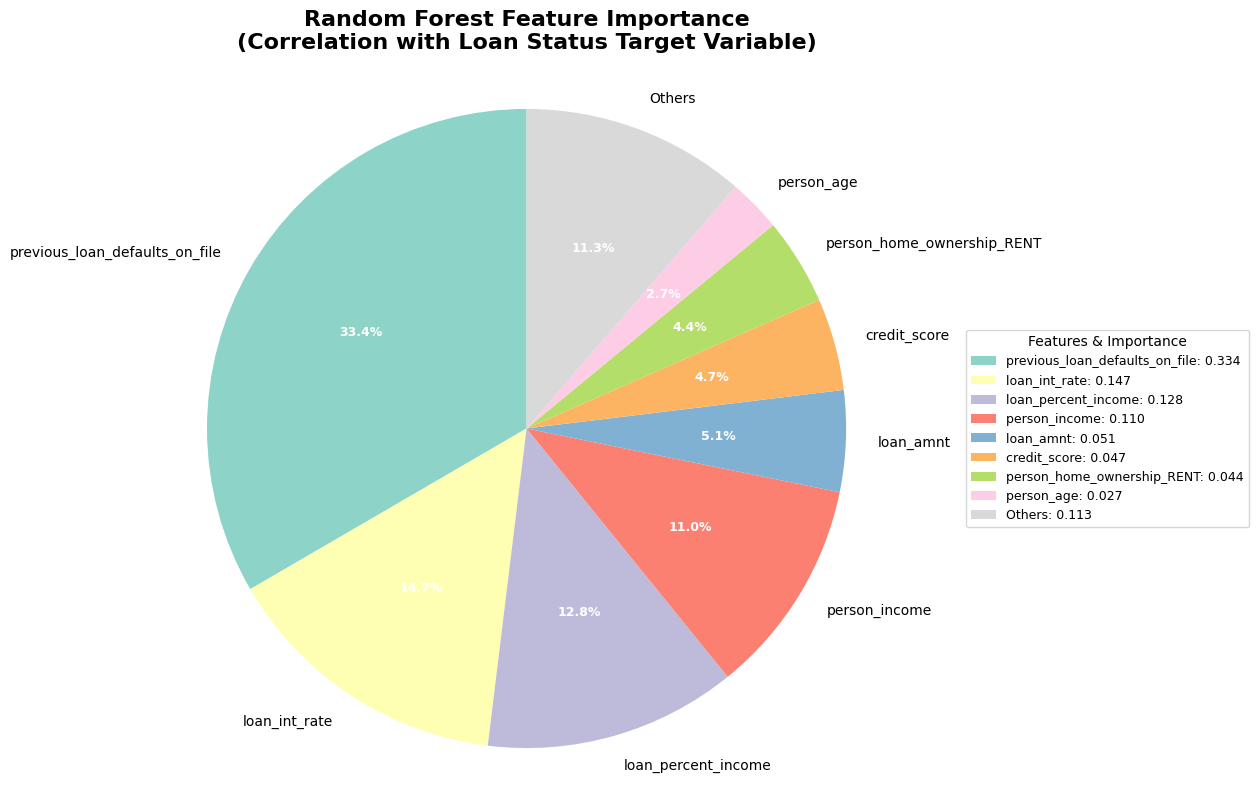


FEATURE IMPORTANCE RANKING
Rank  Feature                        Importance   Percentage
------------------------------------------------------------
1     previous_loan_defaults_on_file 0.3338       33.4      %
2     loan_int_rate                  0.1468       14.7      %
3     loan_percent_income            0.1277       12.8      %
4     person_income                  0.1097       11.0      %
5     loan_amnt                      0.0513       5.1       %
6     credit_score                   0.0466       4.7       %
7     person_home_ownership_RENT     0.0438       4.4       %
8     person_age                     0.0268       2.7       %
9     person_emp_exp                 0.0240       2.4       %
10    cb_person_cred_hist_length     0.0225       2.3       %
11    person_education               0.0147       1.5       %
12    loan_intent_VENTURE            0.0105       1.1       %
13    person_home_ownership_OWN      0.0102       1.0       %
14    person_gender                  0.0067 

In [135]:
import pandas as pd
import matplotlib.pyplot as plt



model = models['Random Forest']
model.fit(X_train_scaled, y_train)
importances = model.feature_importances_  # Direct access, no named_steps
feature_names = X.columns

# Create DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Create pie chart for feature importance
plt.figure(figsize=(12, 8))

# Only show top features for better visualization (combine small ones)
top_n = 8  # Show top 8 features
top_features = importance_df.head(top_n)
other_importance = importance_df.iloc[top_n:]['Importance'].sum()

# Prepare data for pie chart
if other_importance > 0:
    labels = list(top_features['Feature']) + ['Others']
    sizes = list(top_features['Importance']) + [other_importance]
else:
    labels = list(top_features['Feature'])
    sizes = list(top_features['Importance'])

# Create the pie chart
colors = plt.cm.Set3(range(len(labels)))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                   startangle=90, colors=colors, 
                                   textprops={'fontsize': 10})

# Customize the chart
plt.title('Random Forest Feature Importance\n(Correlation with Loan Status Target Variable)', 
          fontsize=16, fontweight='bold', pad=20)

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

# Add a legend with feature names and importance values
legend_labels = [f'{label}: {size:.3f}' for label, size in zip(labels, sizes)]
plt.legend(wedges, legend_labels, title="Features & Importance", 
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

# Also display the detailed importance table
print("\n" + "="*60)
print("FEATURE IMPORTANCE RANKING")
print("="*60)
print(f"{'Rank':<5} {'Feature':<30} {'Importance':<12} {'Percentage':<10}")
print("-" * 60)

for idx, (_, row) in enumerate(importance_df.iterrows(), 1):
    percentage = row['Importance'] * 100
    print(f"{idx:<5} {row['Feature']:<30} {row['Importance']:<12.4f} {percentage:<10.1f}%")

In [136]:
org_df= pd.read_csv('loan_data.csv')
print(org_df['loan_intent'].value_counts())
print(org_df['person_home_ownership'].value_counts())

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64


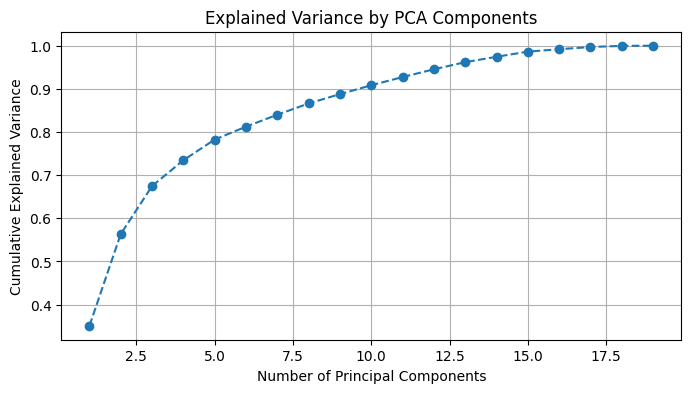

In [137]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler


pca = PCA()
pca.fit(X_train_scaled) 

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()



We will use PCA to check the variance among the features in our dataset. We can observe that as the variance increases, each feature contributes lesser and lesser towards the variance. This indicates a need to drop columns towards the end. 

In [138]:
df=df.drop(columns=[
    'person_home_ownership_OTHER',
    'loan_intent_HOMEIMPROVEMENT',
    'loan_intent_MEDICAL',
    'loan_intent_PERSONAL',
    'loan_intent_EDUCATION',    
    'loan_intent_VENTURE',
    'person_gender'
],axis=1)

X = df.drop(['loan_status'], axis=1)
feature_names = X.columns
feature_names




Index(['person_age', 'person_education', 'person_income', 'person_emp_exp',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'person_home_ownership_OWN',
       'person_home_ownership_RENT'],
      dtype='object')

After training the model, and seeing the importance of each feature through VIF, we can see that the column 


[
    'person_home_ownership_OTHER',
    'loan_intent_HOMEIMPROVEMENT',
    'loan_intent_MEDICAL',
    'loan_intent_PERSONAL',
    'loan_intent_EDUCATION',
    'loan_intent_VENTURE',
    'person_gender']


    
 has a very low importance as well as a very low data count in the original dataframe. This means that the columns rarely appears and only adds more noise, so we will drop it. We can also see through the variance graph that past 11 features, the features barely affects the variance and also causes higher dimensionaility. While dropping this causes a drop in our accuracy and scores, when training new models or using an updated dataset, the training times will be reduced significantly due to the lesser amount of features.

In [139]:


from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_scaled = scaler.fit_transform(X)


X_df = pd.DataFrame(X_scaled, columns=feature_names)  

vif_data = pd.DataFrame()
vif_data["feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))
high_vif_features = vif_data[vif_data["VIF"] > 5]["feature"].tolist()
print("High VIF Features:", high_vif_features)



                           feature        VIF
0                       person_age  11.913873
3                   person_emp_exp   8.416613
7       cb_person_cred_hist_length   5.094999
4                        loan_amnt   2.384413
6              loan_percent_income   2.366464
11      person_home_ownership_RENT   1.748513
2                    person_income   1.552300
9   previous_loan_defaults_on_file   1.506437
10       person_home_ownership_OWN   1.202630
1                 person_education   1.131563
8                     credit_score   1.081184
5                    loan_int_rate   1.073842
High VIF Features: ['person_age', 'person_emp_exp', 'cb_person_cred_hist_length']


In [140]:
df.drop(columns=['person_emp_exp'], inplace=True)

After seeing the VIF values for each features, It is not worth it to do PCA onto the dataset as there aren't many columns that have high VIF features. We can see that there are three features with 
relatively high correlation (person_age, person_emp_exp, cb_person_cred_hist_length). 

This means that they it creates redundancy within the dataset. We will remove person_emp_exp out of the three as this approach ensures you keep the most loan-relevant and business-critical features while resolving multicollinearity issues. 

Employment experience provides the least unique value for loan prediction compared to the direct financial indicators of age and credit history length.

However, after trying to remove persom_emp_exp, we can observe that the model accuracy dips a substantial amount. In reference to HistGradient Boosting, the accuracy dipped around ~1%. The VIF is not critically high for it to be necessary to remove. This is in reference to Appendix[6]

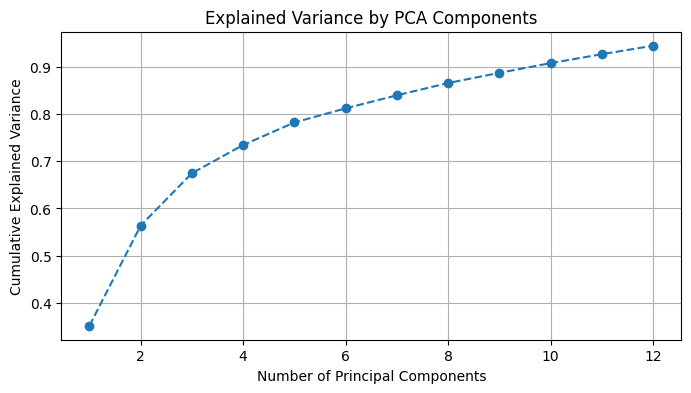

In [141]:
from sklearn.decomposition import PCA

X = df.drop(['loan_status'], axis=1)

X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=12)
pca.fit(X_train_scaled)  

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

We can see now that with only 11 features, we can already reach a cumulative explained variance of around 95% of our original dataset. Comparing from when we had 19 features, losing 8 features for only a 5% variance loss is ideal.

 This is because the 5% variance loss is primarily noise and redundancy, while the 8 features dropped were either correlated with others or contributed little unique information to loan prediction.

# 4. Model training and exporting

## Training our models

In [142]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X= df.drop(['loan_status'], axis=1)
y = df['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42, sampling_strategy=0.3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

Why use SMOTE?

SMOTE takes into account the relationships of all the features and creates synthetic data that is accurate to our dataset. Since we have an imbalance dataset, SMOTE can help us create synthetic data of our minority class. This results in: 

Balance the class distribution

Improve recall, F1-score, and AUC for minority classes

Reduce overfitting compared to simple duplication

Help models learn better decision boundaries



Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6990
           1       0.61      0.91      0.73      2010

    accuracy                           0.85      9000
   macro avg       0.79      0.87      0.82      9000
weighted avg       0.89      0.85      0.86      9000



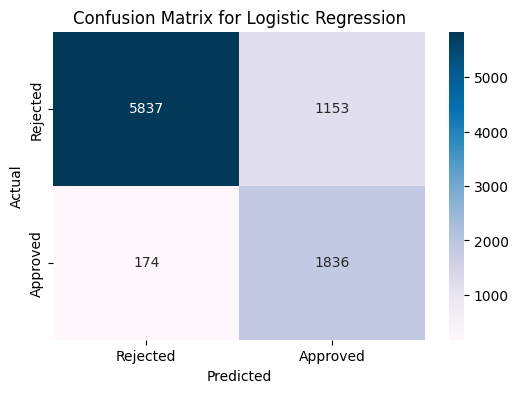

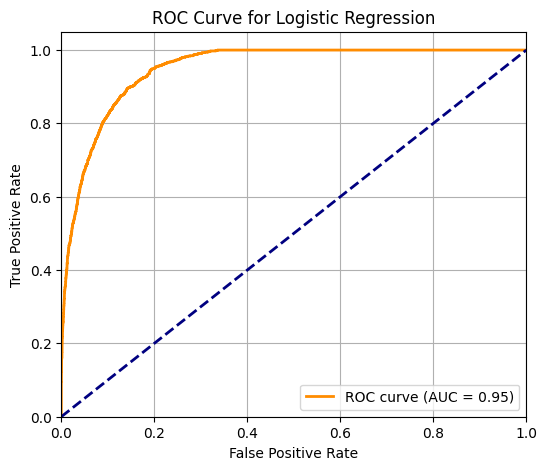



Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6990
           1       0.76      0.75      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000



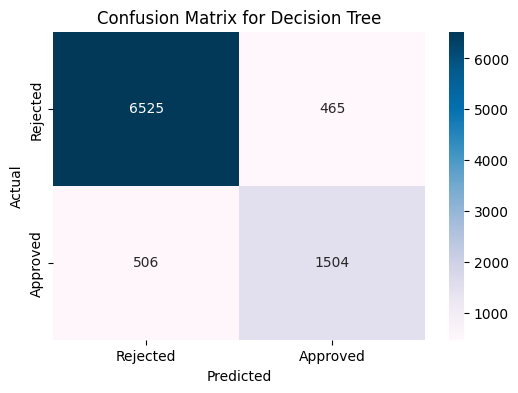

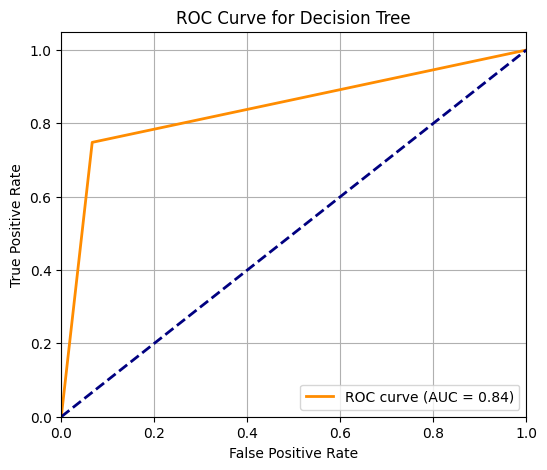



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.87      0.76      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



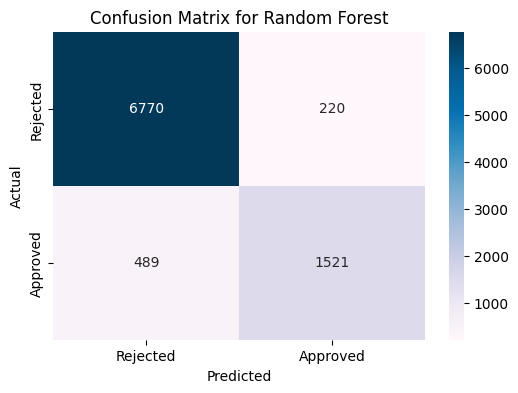

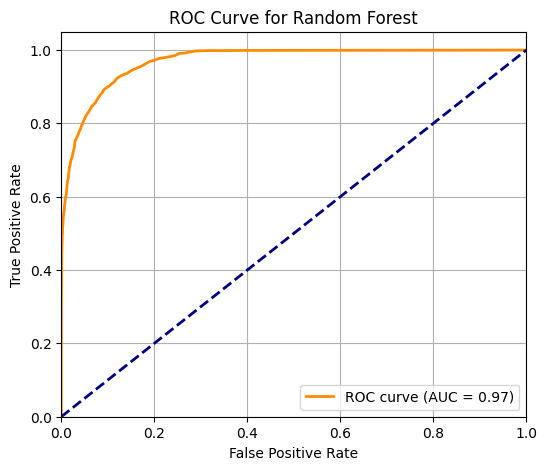



Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6990
           1       0.86      0.76      0.80      2010

    accuracy                           0.92      9000
   macro avg       0.89      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



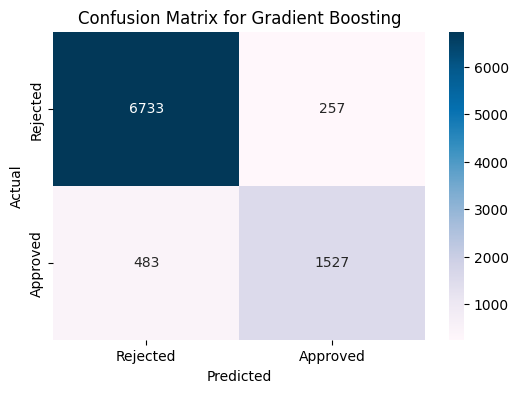

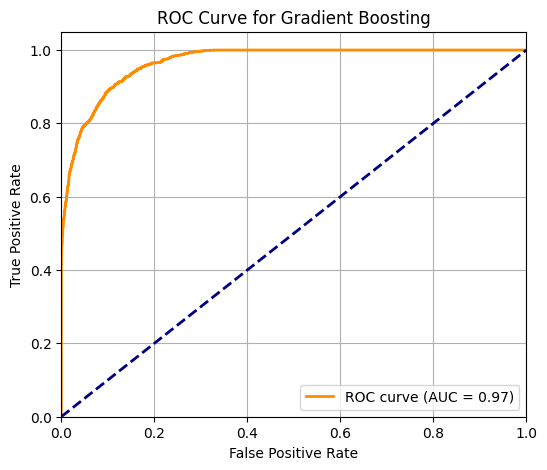



Classification Report for HistGradient Boosting:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6990
           1       0.85      0.79      0.82      2010

    accuracy                           0.92      9000
   macro avg       0.89      0.87      0.88      9000
weighted avg       0.92      0.92      0.92      9000



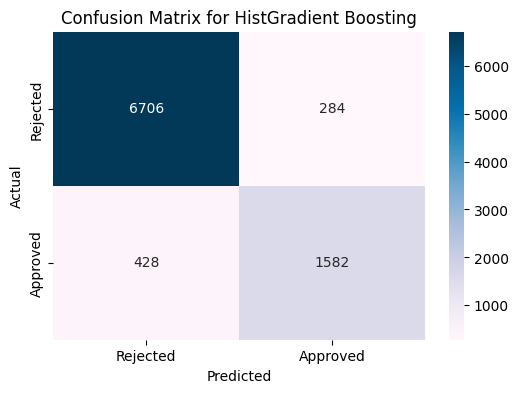

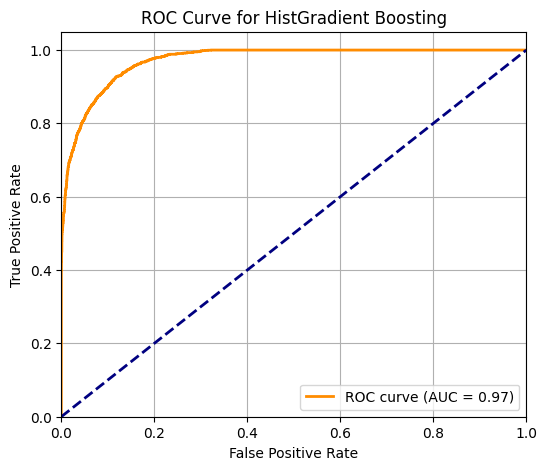



Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      6990
           1       0.62      0.93      0.75      2010

    accuracy                           0.86      9000
   macro avg       0.80      0.89      0.82      9000
weighted avg       0.90      0.86      0.87      9000



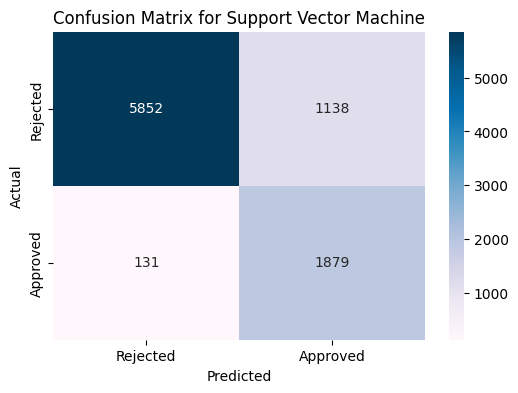

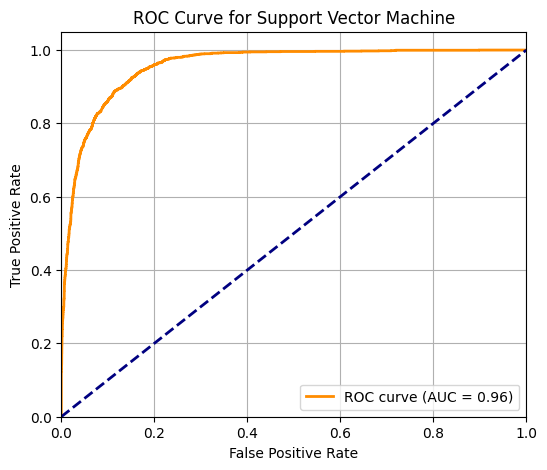



Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.79      0.72      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000



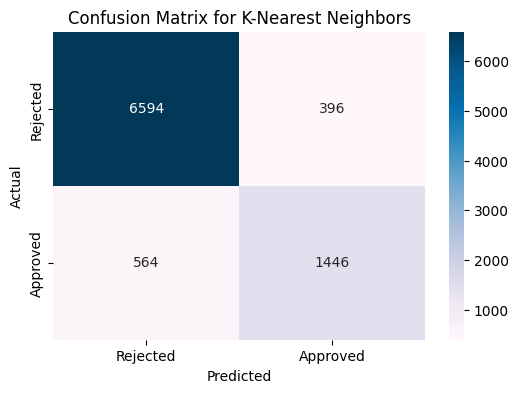

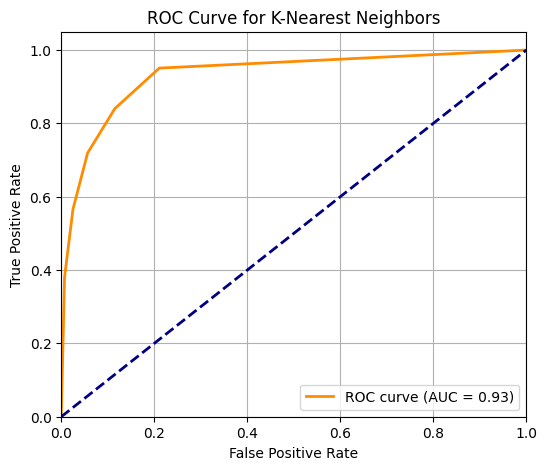



Model Performance Table:


Model  Train Score  Test Score  Accuracy Score  \
0     Logistic Regression     0.853486    0.852556        0.852556   
1           Decision Tree     1.000000    0.892111        0.892111   
2           Random Forest     1.000000    0.921222        0.921222   
3       Gradient Boosting     0.919726    0.917778        0.917778   
4   HistGradient Boosting     0.937687    0.920889        0.920889   
5  Support Vector Machine     0.861423    0.859000        0.859000   
6     K-Nearest Neighbors     0.928075    0.893333        0.893333   

   ROC-AUC Score  
0       0.949089  
1       0.840868  
2       0.970086  
3       0.967425  
4       0.971855  
5       0.956105  
6       0.931192

In [143]:

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc




results = []



for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)

    # Predictions on validation set
    y_val_pred = model.predict(X_test_scaled)
    y_val_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate ROC-AUC
    roc_auc = roc_auc_score(y_test, y_val_proba)

    # Train and Test Scores
    train_score = model.score(X_train_scaled, y_train_resampled)
    test_score = model.score(X_test_scaled, y_test)
    accuracy = accuracy_score(y_test, y_val_pred)

    # Save results
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy,
        'ROC-AUC Score': roc_auc
    })

    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_val_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_val_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu',
                xticklabels=['Rejected', 'Approved'],
                yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_val_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)

**Insights**

Random Forest and HistGradient Boosting achieved the highest test accuracy (~92%) and ROC-AUC scores (~0.96-0.97), indicating strong overall performance.

Gradient Boosting also performed very well, with test accuracy around 92% and ROC-AUC close to 0.97.

Decision Tree and K-Nearest Neighbors showed good accuracy (~90%) but lower ROC-AUC compared to ensemble methods.

Logistic Regression and Support Vector Machine had slightly lower accuracy (~86-87%) but decent ROC-AUC scores (above 0.95), indicating good discrimination ability despite lower accuracy.

The Decision Tree and Random Forest models show signs of overfitting, with perfect training scores but lower test scores.

Overall, ensemble methods like Random Forest, HistGradient Boosting, and Gradient Boosting provide the best balance of accuracy and ROC-AUC on the test data.

Feature pruning, preprocessing (SMOTE and scaling) helped reduce the dataset’s dimensionality, improve interpretability, and mitigate overfitting, all while maintaining comparable model performance.
With reference to Appendix [1], we can see that there is a improvement in the models when preprocessing is done to the data comapared to the raw data.

In [144]:
df.shape

(45000, 12)

## Hypertuning the models

In [145]:
from sklearn.model_selection import GridSearchCV


hgb_params_focused = {
    'learning_rate': [0.1, 0.15, 0.2],
    'max_iter': [300, 500],
    'max_depth': [6, 8],
    'max_leaf_nodes': [50, 100],
    'min_samples_leaf': [5, 10],
    'l2_regularization': [0.01, 0.1]
}

hgb_grid = GridSearchCV(
    estimator=models['HistGradient Boosting'],
    param_grid=hgb_params_focused,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

hgb_grid.fit(X_train_scaled, y_train_resampled)
y_val_pred=hgb_grid.predict(X_test_scaled)
y_val_proba = hgb_grid.predict_proba(X_test_scaled)[:, 1]

train_score = model.score(X_train_resampled, y_train_resampled)
test_score = model.score(X_test_scaled, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)

roc_auc = roc_auc_score(y_test, y_val_proba)

# Classification report
print(f"Classification Report for HistGradientBoosting:\n")
print(classification_report(y_test, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_val_pred)

print("Best HGB Params:", hgb_grid.best_params_)
print(accuracy)
print(f"ROC-AUC Score for HistGradientBoosting: {roc_auc:.4f}"  )


c:\Users\benna\Documents\mldp\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Classification Report for HistGradientBoosting:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6990
           1       0.86      0.79      0.82      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.88      0.89      9000
weighted avg       0.92      0.92      0.92      9000

Best HGB Params: {'l2_regularization': 0.01, 'learning_rate': 0.1, 'max_depth': 6, 'max_iter': 300, 'max_leaf_nodes': 50, 'min_samples_leaf': 5}
0.9241111111111111
ROC-AUC Score for HistGradientBoosting: 0.9731


In [146]:

gb_params_focused = {
    'n_estimators': [200, 300],
    'learning_rate': [0.1, 0.15],
    'max_depth': [4, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'subsample': [0.9, 1.0]
}

gb_grid = GridSearchCV(
    estimator=models['Gradient Boosting'],
    param_grid=gb_params_focused,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

gb_grid.fit(X_train_scaled, y_train_resampled)
y_val_pred=gb_grid.predict(X_test_scaled)
y_val_proba = gb_grid.predict_proba(X_test_scaled)[:, 1]

print(X_train_resampled.columns)
train_score = model.score(X_train_scaled, y_train_resampled)
test_score = model.score(X_test_scaled, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)

roc_auc = roc_auc_score(y_test, y_val_proba)

# Classification report
print(f"Classification Report for GB:\n")
print(classification_report(y_test, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_val_pred)
print("Best GB Params:", gb_grid.best_params_)
print(accuracy)
print('ROC-AUC Score:', roc_auc)



KeyboardInterrupt: 

In [ ]:

rf_params = {
    'n_estimators': [200, 300],
    'max_depth': [10, 15, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}
rf_grid = GridSearchCV(
    estimator=models['Random Forest'],
    param_grid=rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train_scaled, y_train_resampled)
y_val_pred=rf_grid.predict(X_test_scaled)
y_val_proba = rf_grid.predict_proba(X_test_scaled)[:, 1]


train_score = model.score(X_train_scaled, y_train_resampled)
test_score = model.score(X_test, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)

roc_auc = roc_auc_score(y_test, y_val_proba)

# Classification report
print(f"Classification Report for RF:\n")
print(classification_report(y_test, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_val_pred)
print("Best RF Params:", rf_grid.best_params_)
print(accuracy)
print(f"ROC-AUC Score for RF: {roc_auc:.4f}")


Classification Report for RF:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6990
           1       0.83      0.80      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.89      0.88      0.88      9000
weighted avg       0.92      0.92      0.92      9000

Best RF Params: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
0.9184444444444444


c:\Users\benna\Documents\mldp\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


After tuning the hyperparameters for the three best models from our training, we can see that their scores are all around better than without tuning. We are focusing on precision for minority class (loan accepted) but also don't want the recall to be too low. Since we're using a stacking classifier that requires different estimators, I tried using the three best different models (e.g. tree, linear) but it proves to be a lower score than just using the best three models, which is why I decided to train these models instead. Refer to Appendix [5]


Refer to Appendix [4] to see the different parameters used to ensure the tuning resulted in better params.

## Ensemble models to combine our three best models.

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(

    estimators=[
        ('hgb', hgb_grid.best_estimator_),
        ('gb', gb_grid.best_estimator_),
        ('rf', rf_grid.best_estimator_)
    ],
    voting='soft'
)
voting_clf.fit(X_train_scaled, y_train_resampled)


# Predictions on validation set
y_val_pred = voting_clf.predict(X_test_scaled)
y_val_proba = voting_clf.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_val_proba)



# Train and Test Scores
train_score = voting_clf.score(X_train_scaled, y_train_resampled)
test_score = voting_clf.score(X_test_scaled, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)


# Classification report
print(f"Classification Report for Voting Classifier:\n")
print(classification_report(y_test, y_val_pred))
print('Accuracy:',accuracy)
print('ROC AUC:', roc_auc)

Classification Report for Voting Classifier:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6990
           1       0.86      0.80      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.90      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000

Accuracy: 0.9267777777777778
ROC AUC: 0.9739894234122662


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Assuming these are already tuned:
# hgb_grid, lr_grid, svc_grid (with SVC(probability=True))

stacking_clf = StackingClassifier(
    estimators=[
        ('hgb', hgb_grid.best_estimator_),
        ('gb', gb_grid.best_estimator_),
        ('rf', rf_grid.best_estimator_)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1,
    passthrough=True,  # set to True if you want original features + base predictions
    stack_method='auto'  # usually 'predict_proba' if soft outputs exist
)

stacking_clf.fit(X_train_scaled, y_train_resampled)


# Predictions on validation set
y_val_pred = stacking_clf.predict(X_test_scaled)
y_val_proba = stacking_clf.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_val_proba)


# Train and Test Scores
train_score = stacking_clf.score(X_train_scaled, y_train_resampled)
test_score = stacking_clf.score(X_test_scaled, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)


# Classification report
print(f"Classification Report for Stacking Classifier:\n")
print(classification_report(y_test, y_val_pred))
print(accuracy)
print('ROC AUC:', roc_auc)


Classification Report for Stacking Classifier:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6990
           1       0.86      0.80      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.90      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000

0.9266666666666666
ROC AUC: 0.9736485668937145


Putting three of the best distinct models through ensemble learning models so that it can leverage the strengths of different models to improve overall accuracy and robustness. I chose the voting classifier as the ensemble model to be used because the stacking classifier proves to have a lower score.

The reason why we use three different models of different types is because it allows the models to leverage each of the different model strengths instead of only using similar models. Also allows for errors to be corrected as they are different for every model type. We can see that Voting classifier performs better than all our single models and the stacking classifier, so we will be using this model as the final model for inference. The metric is based on precision. Since this is a loan acceptance predictor, we will want to ensure that the out of all accepted loans, there is a high percentage of these loans being correctly accepted. And also ensure that the recall is not too low, this model has the best balance.



In [ ]:


# Wrap the fitted StackingClassifier in a pipeline (even if just for consistency)
full_pipeline = Pipeline([
    ('voting', voting_clf)  # stacker is your fitted StackingClassifier
])

full_pipeline.fit(X_train, y_train)
# Export the pipeline
dump(full_pipeline, 'voting_pipeline.pkl')

print('Voting Classifier pipeline saved as voting_pipeline.pkl')


c:\Users\benna\Documents\mldp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['kept_columns.pkl']

In [ ]:
import sklearn
print(sklearn.__version__)  # From the training environment

1.6.1


# 5. Appendix


## The scores when no data preprocessing (scaling, SMOTE, dropping of columns) is done. [1]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from joblib import dump

df= pd.read_csv('loan_data.csv')

# Binary Encoding for person_gender
df['person_gender'] = df['person_gender'].map({'female': 0, 'male': 1})
# Binary Encoding for previous_loan_defaults_on_file
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

# Ordinal Encoding for person_education (if applicable)
education_order = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 
                   'Master': 4, 'Doctorate': 5}
df['person_education'] = df['person_education'].map(education_order)

# One-Hot Encoding for person_home_ownership and loan_intent
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

# Replacing Outliers with Median
median_age = df['person_age'].median()
df['person_age'] = df['person_age'].apply(lambda x: median_age if x > 100 else x)

# Display the transformed DataFrame
print(df.head())

   person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0                 4        71948.0               0   
1        21.0              0                 1        12282.0               0   
2        25.0              0                 1        12438.0               3   
3        23.0              0                 3        79753.0               0   
4        24.0              1                 4        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  previous_loan_d

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      6990
           1       0.44      0.75      0.56      2010

    accuracy                           0.73      9000
   macro avg       0.68      0.74      0.68      9000
weighted avg       0.81      0.73      0.75      9000



c:\Users\benna\Documents\mldp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


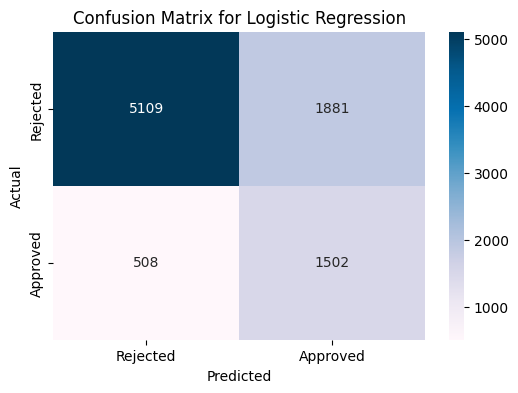



Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6990
           1       0.79      0.78      0.78      2010

    accuracy                           0.90      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.90      0.90      0.90      9000



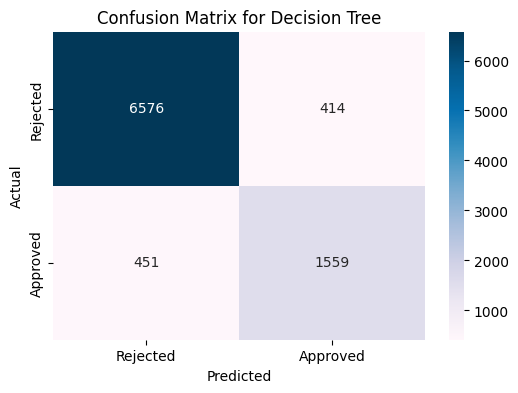



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      6990
           1       0.90      0.76      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



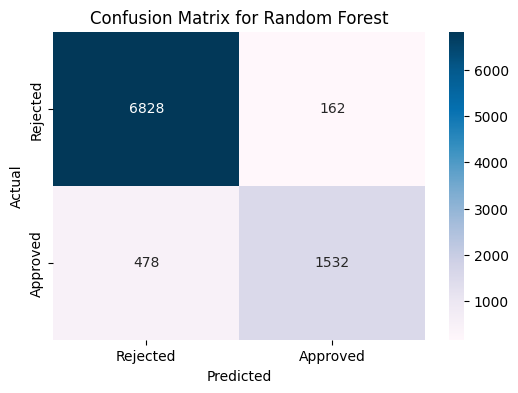



Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.87      0.76      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



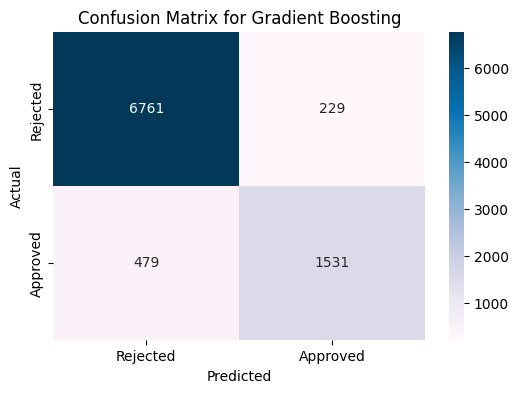



Classification Report for HistGradient Boosting:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.79      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



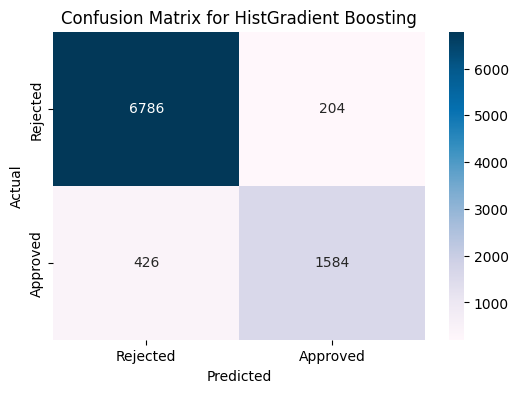



Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      6990
           1       0.43      0.63      0.51      2010

    accuracy                           0.73      9000
   macro avg       0.66      0.70      0.66      9000
weighted avg       0.78      0.73      0.75      9000



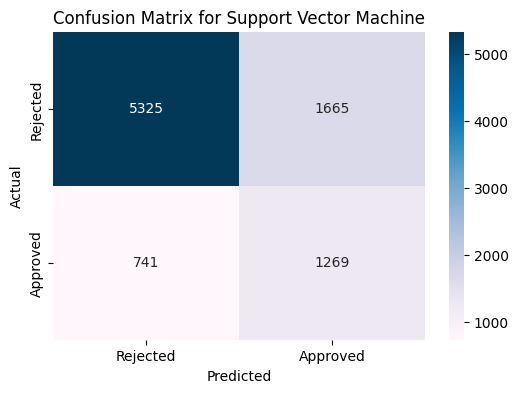



Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6990
           1       0.65      0.51      0.58      2010

    accuracy                           0.83      9000
   macro avg       0.76      0.72      0.73      9000
weighted avg       0.82      0.83      0.82      9000



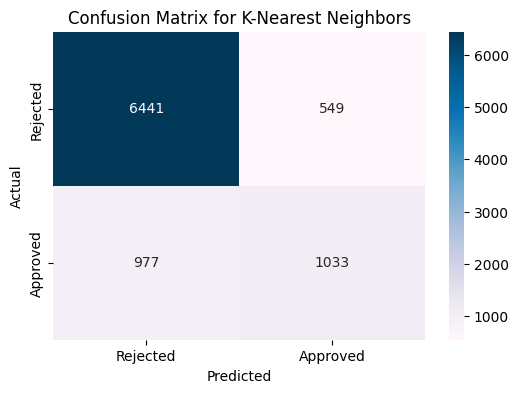



Model Performance Table:


Model  Train Score  Test Score  Accuracy Score
0     Logistic Regression     0.738972    0.734556        0.734556
1           Decision Tree     1.000000    0.903889        0.903889
2           Random Forest     1.000000    0.928889        0.928889
3       Gradient Boosting     0.925583    0.921333        0.921333
4   HistGradient Boosting     0.946972    0.930000        0.930000
5  Support Vector Machine     0.735000    0.732667        0.732667
6     K-Nearest Neighbors     0.880000    0.830444        0.830444

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

X= df.drop(['loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



results = []

for name, model in models.items():

    model.fit(X_train, y_train)

    
    # Predictions on validation set
    y_val_pred = model.predict(X_test)

    
    # Train and Test Scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_val_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })
    
    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_val_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)

## Model training scores when RobustScaling is applied. [2]

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6990
           1       0.63      0.91      0.74      2010

    accuracy                           0.86      9000
   macro avg       0.80      0.88      0.82      9000
weighted avg       0.89      0.86      0.87      9000



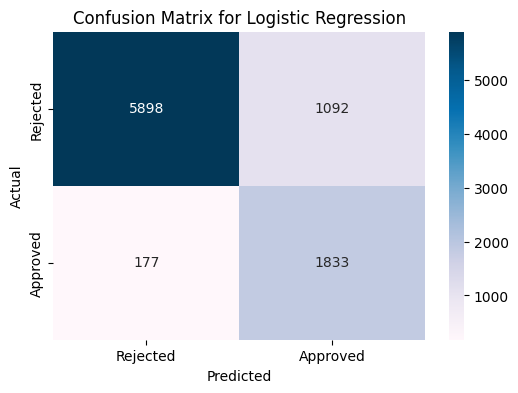



Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6990
           1       0.79      0.78      0.78      2010

    accuracy                           0.90      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.90      0.90      0.90      9000



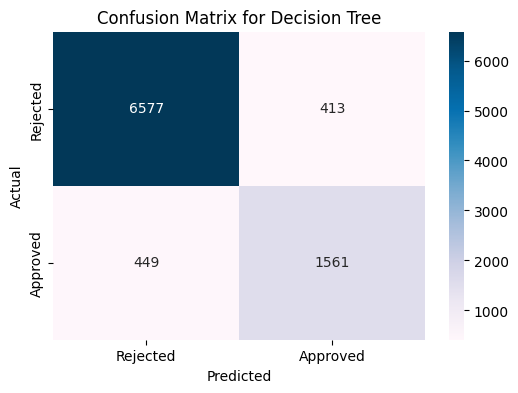



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      6990
           1       0.90      0.76      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



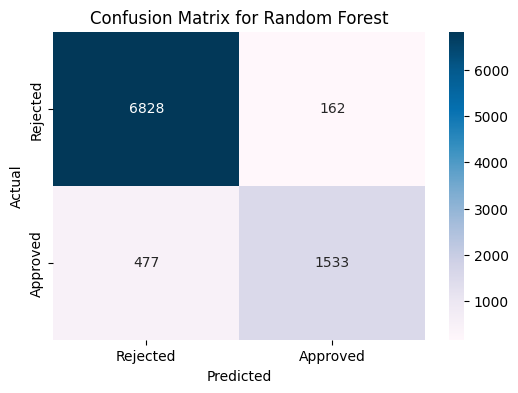



Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.87      0.76      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



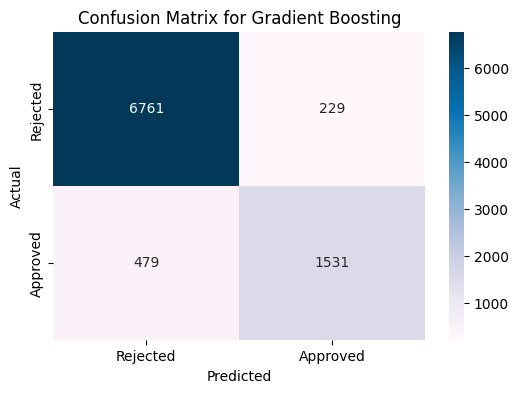



Classification Report for HistGradient Boosting:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.79      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



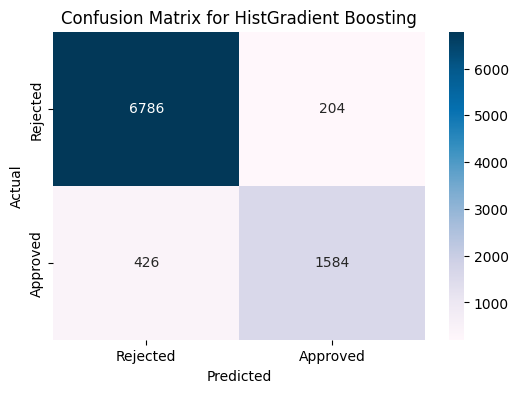



Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      6990
           1       0.65      0.93      0.76      2010

    accuracy                           0.87      9000
   macro avg       0.81      0.89      0.84      9000
weighted avg       0.90      0.87      0.88      9000



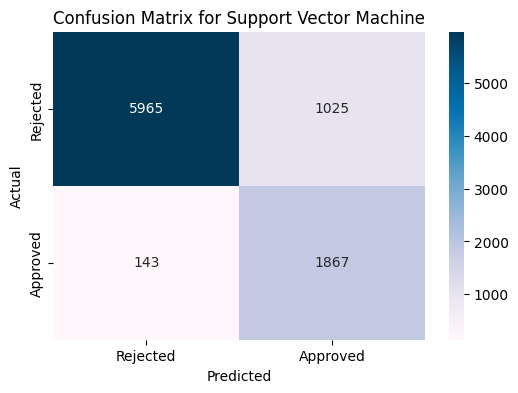



Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6990
           1       0.82      0.72      0.76      2010

    accuracy                           0.90      9000
   macro avg       0.87      0.83      0.85      9000
weighted avg       0.90      0.90      0.90      9000



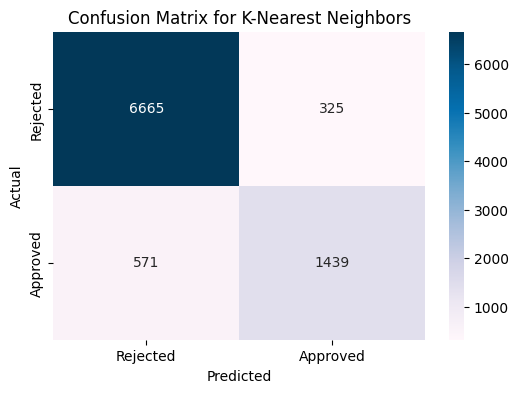



Model Performance Table:


Model  Train Score  Test Score  Accuracy Score
0     Logistic Regression     0.857972    0.859000        0.859000
1           Decision Tree     1.000000    0.904222        0.904222
2           Random Forest     1.000000    0.929000        0.929000
3       Gradient Boosting     0.925583    0.921333        0.921333
4   HistGradient Boosting     0.946972    0.930000        0.930000
5  Support Vector Machine     0.876000    0.870222        0.870222
6     K-Nearest Neighbors     0.931500    0.900444        0.900444

In [ ]:
X= df.drop(['loan_status'], axis=1)
y = df['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




results = []

for name, model in models.items():

    model.fit(X_train_scaled, y_train)

    
    # Predictions on validation set
    y_val_pred = model.predict(X_test_scaled)

    
    # Train and Test Scores
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_val_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })
    
    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_val_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)

## Model Training scores with Scaler + SMOTE [3]

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6990
           1       0.62      0.91      0.74      2010

    accuracy                           0.86      9000
   macro avg       0.80      0.88      0.82      9000
weighted avg       0.89      0.86      0.87      9000



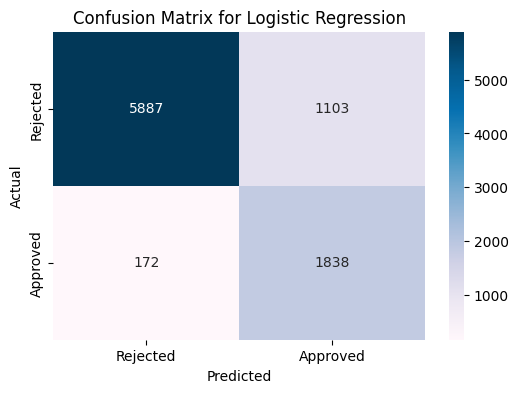



Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6990
           1       0.78      0.78      0.78      2010

    accuracy                           0.90      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.90      0.90      0.90      9000



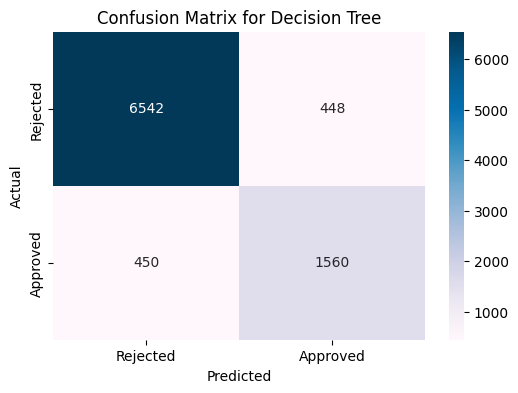



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6990
           1       0.90      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



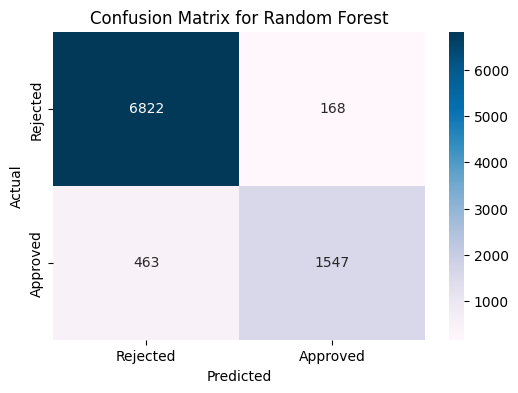



Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.87      0.77      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.87      0.88      9000
weighted avg       0.92      0.92      0.92      9000



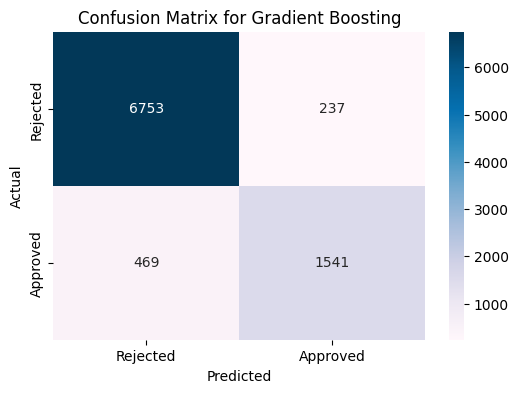



Classification Report for HistGradient Boosting:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.88      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



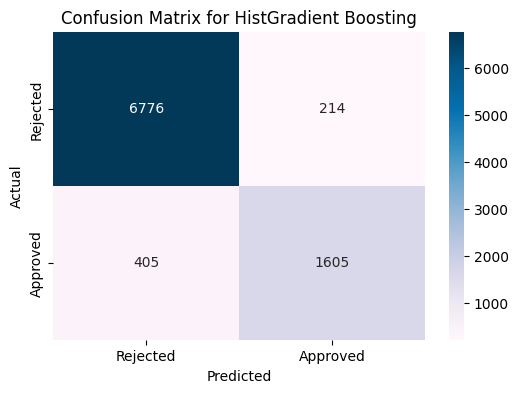



Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      6990
           1       0.64      0.93      0.76      2010

    accuracy                           0.87      9000
   macro avg       0.81      0.89      0.84      9000
weighted avg       0.90      0.87      0.88      9000



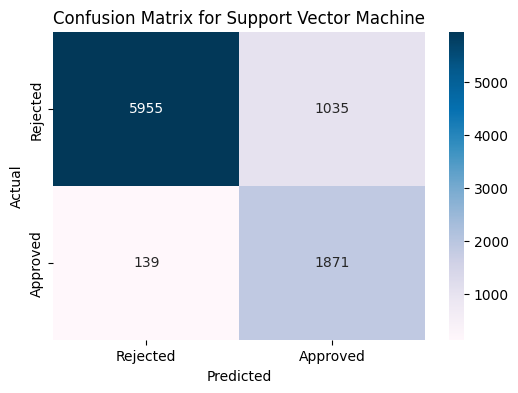



Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6990
           1       0.81      0.72      0.76      2010

    accuracy                           0.90      9000
   macro avg       0.87      0.84      0.85      9000
weighted avg       0.90      0.90      0.90      9000



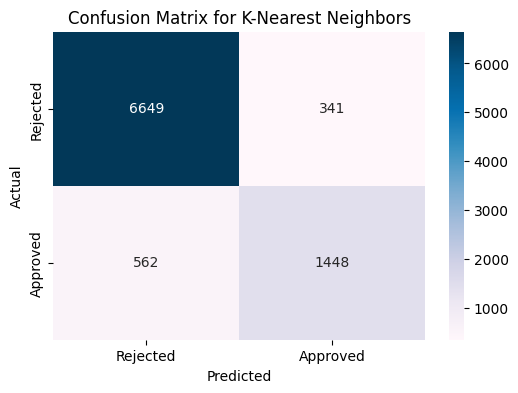



Model Performance Table:


Model  Train Score  Test Score  Accuracy Score
0     Logistic Regression     0.858567    0.858333        0.858333
1           Decision Tree     1.000000    0.900222        0.900222
2           Random Forest     1.000000    0.929889        0.929889
3       Gradient Boosting     0.924670    0.921556        0.921556
4   HistGradient Boosting     0.945569    0.931222        0.931222
5  Support Vector Machine     0.876802    0.869556        0.869556
6     K-Nearest Neighbors     0.931041    0.899667        0.899667

In [ ]:
X= df.drop(['loan_status'], axis=1)
y = df['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42, sampling_strategy=0.3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)








results = []

for name, model in models.items():

    model.fit(X_train_scaled, y_train_resampled)

    
    # Predictions on validation set
    y_val_pred = model.predict(X_test_scaled)

    
    # Train and Test Scores
    train_score = model.score(X_train_scaled, y_train_resampled)
    test_score = model.score(X_test_scaled, y_test)
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_val_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })
    
    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_val_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)

## HyperTuning Parameters[4]

In [ ]:
hgb_params = {
    'learning_rate': [0.01, 0.1],          
    'max_iter': [100, 200],
    'max_depth': [None, 5, 10],
    'l2_regularization': [0.0, 0.1]
}

lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000]
}

svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


## Different models for stacking classifier [5]

In [ ]:

lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

lr_grid = GridSearchCV(
    estimator=models['Logistic Regression'],
    param_grid=lr_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

lr_grid.fit(X_train_scaled, y_train_resampled)
y_val_pred=lr_grid.predict(X_test_scaled)

print(X_train_resampled.columns)
train_score = model.score(X_train_scaled, y_train_resampled)
test_score = model.score(X_test_scaled, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)



# Classification report
print(f"Classification Report for Logistic Regression:\n")
print(classification_report(y_test, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_val_pred)
print("Best LR Params:", lr_grid.best_params_)
print(accuracy)



Index(['person_age', 'person_education', 'person_income', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file',
       'person_home_ownership_OWN', 'person_home_ownership_RENT'],
      dtype='object')
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6990
           1       0.61      0.91      0.73      2010

    accuracy                           0.85      9000
   macro avg       0.79      0.87      0.82      9000
weighted avg       0.89      0.85      0.86      9000

Best LR Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.8527777777777777


In [ ]:

svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc_grid = GridSearchCV(
    estimator=models['Support Vector Machine'],
    param_grid=svc_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

svc_grid.fit(X_train_scaled, y_train_resampled)
svc_grid.predict(X_test_scaled)

train_score = model.score(X_train_scaled, y_train_resampled)
test_score = model.score(X_test, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)



# Classification report
print(f"Classification Report for SVC:\n")
print(classification_report(y_test, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_val_pred)
print("Best SVC Params:", svc_grid.best_params_)
print(accuracy)


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Assuming these are already tuned:
# hgb_grid, lr_grid, svc_grid (with SVC(probability=True))

stacking_clf = StackingClassifier(
    estimators=[
        ('hgb', hgb_grid.best_estimator_),
        ('lr', lr_grid.best_estimator_),
        ('svc', svc_grid.best_estimator_)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1,
    passthrough=True,  # set to True if you want original features + base predictions
    stack_method='auto'  # usually 'predict_proba' if soft outputs exist
)

stacking_clf.fit(X_train_scaled, y_train_resampled)


# Predictions on validation set
y_val_pred = stacking_clf.predict(X_test_scaled)
y_val_proba = stacking_clf.predict_proba(X_test_scaled)[:, 1]



# Train and Test Scores
train_score = stacking_clf.score(X_train_scaled, y_train_resampled)
test_score = stacking_clf.score(X_test_scaled, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)
roc_auc = roc_auc_score(y_test, y_val_proba)


# Classification report
print(f"Classification Report for Stacking Classifier:\n")
print(classification_report(y_test, y_val_pred))
print(accuracy)
print('ROC AUC:', roc_auc)

Classification Report for Stacking Classifier:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.87      0.82      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000

0.9325555555555556


In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(

    estimators=[
        ('hgb', hgb_grid.best_estimator_),
        ('lr', lr_grid.best_estimator_),
        ('svc', svc_grid.best_estimator_)
    ],
    voting='soft'
)
voting_clf.fit(X_train_scaled, y_train_resampled)


# Predictions on validation set
y_val_pred = voting_clf.predict(X_test_scaled)
y_val_proba = voting_clf.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_val_proba)



# Train and Test Scores
train_score = voting_clf.score(X_train_scaled, y_train_resampled)
test_score = voting_clf.score(X_test_scaled, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)


# Classification report
print(f"Classification Report for Voting Classifier:\n")
print(classification_report(y_test, y_val_pred))
print('Accuracy:',accuracy)
print('ROC AUC:', roc_auc)

## Model scores when no columns are dropped [6]

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df=df.drop(columns=[
    'person_home_ownership_OTHER',
    'loan_intent_HOMEIMPROVEMENT',
    'loan_intent_MEDICAL',
    'loan_intent_PERSONAL',
    'loan_intent_EDUCATION',    
    'loan_intent_VENTURE',
    'person_gender',
    
],axis=1)

X= df.drop(['loan_status'], axis=1)
y = df['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42, sampling_strategy=0.3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc




results = []



for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)

    # Predictions on validation set
    y_val_pred = model.predict(X_test_scaled)
    y_val_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate ROC-AUC
    roc_auc = roc_auc_score(y_test, y_val_proba)

    # Train and Test Scores
    train_score = model.score(X_train_scaled, y_train_resampled)
    test_score = model.score(X_test_scaled, y_test)
    accuracy = accuracy_score(y_test, y_val_pred)

    # Save results
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy,
        'ROC-AUC Score': roc_auc
    })

    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_val_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_val_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu',
                xticklabels=['Rejected', 'Approved'],
                yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_val_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)

## Model training when person_emp_exp is dropped [7]

In [ ]:

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc


df.drop(columns=['person_emp_exp'], inplace=True)
X= df.drop(['loan_status'], axis=1)
y = df['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42, sampling_strategy=0.3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

results = []



for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)

    # Predictions on validation set
    y_val_pred = model.predict(X_test_scaled)
    y_val_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate ROC-AUC
    roc_auc = roc_auc_score(y_test, y_val_proba)

    # Train and Test Scores
    train_score = model.score(X_train_scaled, y_train_resampled)
    test_score = model.score(X_test_scaled, y_test)
    accuracy = accuracy_score(y_test, y_val_pred)

    # Save results
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy,
        'ROC-AUC Score': roc_auc
    })

    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_val_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_val_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu',
                xticklabels=['Rejected', 'Approved'],
                yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_val_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_scaled = scaler.fit_transform(X)
feature_names = X.columns

X_df = pd.DataFrame(X_scaled, columns=feature_names)  

vif_data = pd.DataFrame()
vif_data["feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))
high_vif_features = vif_data[vif_data["VIF"] > 5]["feature"].tolist()
print("High VIF Features:", high_vif_features)

                           feature        VIF
0                       person_age  11.969667
4                   person_emp_exp   8.440476
8       cb_person_cred_hist_length   5.303771
5                        loan_amnt   2.394843
7              loan_percent_income   2.382566
13      person_home_ownership_RENT   2.165442
10  previous_loan_defaults_on_file   1.912533
1                    person_gender   1.669651
3                    person_income   1.553972
14           loan_intent_EDUCATION   1.438993
16             loan_intent_MEDICAL   1.435871
18             loan_intent_VENTURE   1.406306
17            loan_intent_PERSONAL   1.400044
15     loan_intent_HOMEIMPROVEMENT   1.294796
12       person_home_ownership_OWN   1.213486
2                 person_education   1.161971
9                     credit_score   1.118982
6                    loan_int_rate   1.075998
11     person_home_ownership_OTHER   1.007843
High VIF Features: ['person_age', 'person_emp_exp', 'cb_person_cred_hist_length'

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(

    estimators=[
        ('hgb', hgb_grid.best_estimator_),
        ('lr', lr_grid.best_estimator_),
        ('svc', svc_grid.best_estimator_)
    ],
    voting='soft'
)
voting_clf.fit(X_train_resampled, y_train_resampled)

# Predictions on validation set
y_val_pred = voting_clf.predict(X_test)



# Train and Test Scores
train_score = voting_clf.score(X_train_resampled, y_train_resampled)
test_score = voting_clf.score(X_test, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)


# Classification report
print(f"Classification Report for Voting Classifier:\n")
print(classification_report(y_test, y_val_pred))


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report




results = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predictions on validation set
    y_val_pred = model.predict(X_test)
  

    
    # Train and Test Scores
    train_score = model.score(X_train_resampled, y_train_resampled)
    test_score = model.score(X_test, y_test)
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_val_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })
    
    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_val_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)

In [ ]:
# Compare multiple strategies
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from imblearn.over_sampling import SMOTE
strategies = [
    ('No SMOTE', None, 'balanced'),
    ('SMOTE 0.3', 0.3, 'balanced'), 
    ('SMOTE 0.4', 0.4, 'balanced'),
    ('SMOTE 0.5', 0.5, 'balanced')
]

results_comparison = []

for name, strategy, class_weight in strategies:
    print(f"\n{'='*50}")
    print(f"Evaluating: {name}")
    print(f"{'='*50}")
    
    # Apply SMOTE if strategy is specified
    if strategy:
        smote = SMOTE(random_state=42, sampling_strategy=strategy)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        print(f"After SMOTE - Training size: {X_train_res.shape[0]}")
        print(f"Class distribution: {pd.Series(y_train_res).value_counts().sort_index()}")
    else:
        X_train_res, y_train_res = X_train, y_train
        print(f"Original training size: {X_train_res.shape[0]}")
        print(f"Class distribution: {pd.Series(y_train_res).value_counts().sort_index()}")
    
    # Create and train Logistic Regression model
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train_res)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Logistic Regression with class_weight
    lr_model = LogisticRegression(
        random_state=42, 
        class_weight=class_weight,
        max_iter=1000
    )
    
    lr_model.fit(X_train_scaled, y_train_res)
    
    # Make predictions
    y_pred = lr_model.predict(X_test_scaled)
    y_pred_proba = lr_model.predict_proba(X_test_scaled)
    
    # Calculate metrics
    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, average=None, labels=[0, 1]
    )
    
    # Focus on minority class (class 1 - Approved loans)
    minority_precision = precision[1]
    minority_recall = recall[1]
    minority_f1 = f1[1]
    
    # Overall accuracy
    accuracy = lr_model.score(X_test_scaled, y_test)
    
    # Store results
    results_comparison.append({
        'Strategy': name,
        'Training_Size': X_train_res.shape[0],
        'Minority_Class_Count': sum(y_train_res),
        'Accuracy': accuracy,
        'Precision_Approved': minority_precision,
        'Recall_Approved': minority_recall,
        'F1_Approved': minority_f1,
        'Precision_Rejected': precision[0],
        'Recall_Rejected': recall[0]
    })
    
    # Print detailed results
    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Approved Loans - Precision: {minority_precision:.4f}, Recall: {minority_recall:.4f}, F1: {minority_f1:.4f}")
    print(f"Rejected Loans - Precision: {precision[0]:.4f}, Recall: {recall[0]:.4f}")
    
    # Classification report
    print(f"\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))

# Create comparison DataFrame
comparison_df = pd.DataFrame(results_comparison)
print(f"\n{'='*80}")
print("SMOTE STRATEGY COMPARISON SUMMARY")
print(f"{'='*80}")
print(comparison_df.round(4))

# Find best strategy based on F1 score for approved loans
best_strategy = comparison_df.loc[comparison_df['F1_Approved'].idxmax()]
print(f"\n🏆 Best Strategy: {best_strategy['Strategy']}")
print(f"   F1 Score (Approved): {best_strategy['F1_Approved']:.4f}")
print(f"   Precision (Approved): {best_strategy['Precision_Approved']:.4f}")
print(f"   Recall (Approved): {best_strategy['Recall_Approved']:.4f}")


Evaluating: No SMOTE
Original training size: 36000
Class distribution: loan_status
0    28010
1     7990
Name: count, dtype: int64

Results for No SMOTE:
Accuracy: 0.8529
Approved Loans - Precision: 0.6145, Recall: 0.9159, F1: 0.7355
Rejected Loans - Precision: 0.9719, Recall: 0.8348

Detailed Classification Report:
              precision    recall  f1-score   support

    Rejected       0.97      0.83      0.90      6990
    Approved       0.61      0.92      0.74      2010

    accuracy                           0.85      9000
   macro avg       0.79      0.88      0.82      9000
weighted avg       0.89      0.85      0.86      9000


Evaluating: SMOTE 0.3
After SMOTE - Training size: 36413
Class distribution: loan_status
0    28010
1     8403
Name: count, dtype: int64

Results for SMOTE 0.3:
Accuracy: 0.8536
Approved Loans - Precision: 0.6161, Recall: 0.9134, F1: 0.7359
Rejected Loans - Precision: 0.9711, Recall: 0.8363

Detailed Classification Report:
              precision    r

## Model before PCA

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Separate features and target from the train dataset

X = df.drop(['loan_status'], axis=1)
y = df['loan_status']
scaler = RobustScaler()
smote = SMOTE(random_state=42, sampling_strategy=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)




person_age  person_education  person_income  person_emp_exp  loan_amnt  \
0        22.0                 4        71948.0               0    35000.0   
1        21.0                 1        12282.0               0     1000.0   
2        25.0                 1        12438.0               3     5500.0   
3        23.0                 3        79753.0               0    35000.0   
4        24.0                 4        66135.0               1    35000.0   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0          16.02                 0.49                         3.0   
1          11.14                 0.08                         2.0   
2          12.87                 0.44                         3.0   
3          15.23                 0.44                         2.0   
4          14.27                 0.53                         4.0   

   credit_score  previous_loan_defaults_on_file  person_home_ownership_OWN  \
0           561                               0                      False   
1           504                               1                       True   
2           635                               0                      False   
3           675                               0                      False   
4           586                               0                      False   

   person_home_ownership_RENT  
0                        True  
1                       False  
2                       False  
3                        True  
4                        True

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

(45000, 13)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6990
           1       0.62      0.91      0.74      2010

    accuracy                           0.85      9000
   macro avg       0.79      0.87      0.82      9000
weighted avg       0.89      0.85      0.86      9000



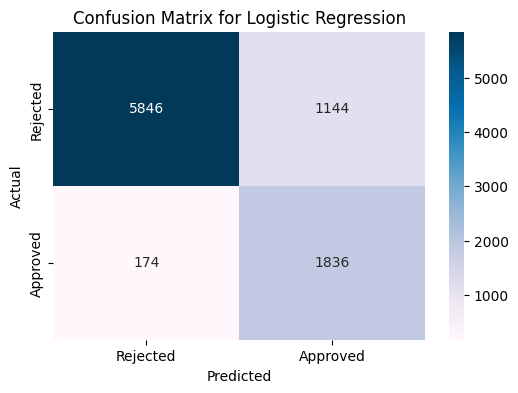



Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.78      0.75      0.76      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.84      0.85      9000
weighted avg       0.90      0.90      0.90      9000



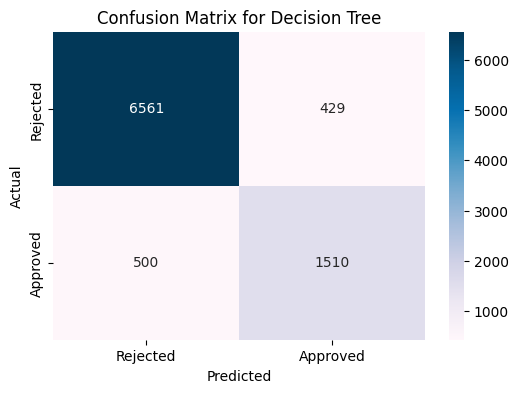



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.87      0.76      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



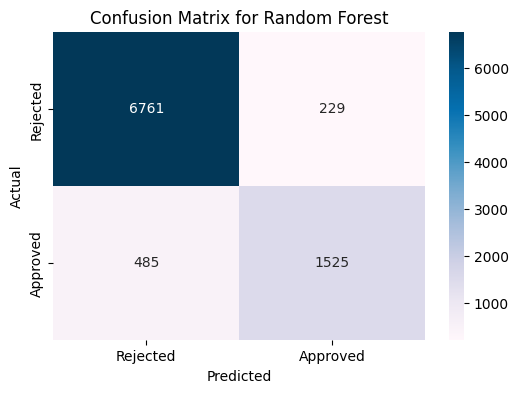



Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6990
           1       0.86      0.76      0.80      2010

    accuracy                           0.92      9000
   macro avg       0.89      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



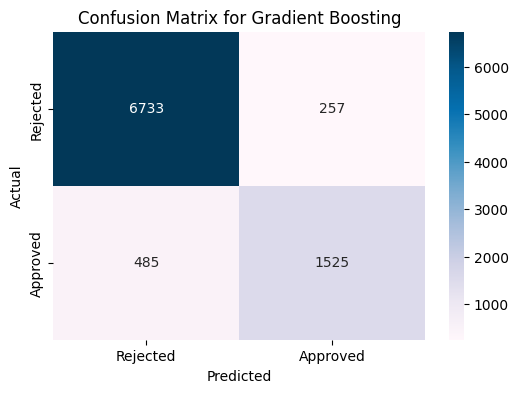



Classification Report for HistGradient Boosting:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6990
           1       0.85      0.79      0.82      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.88      0.89      9000
weighted avg       0.92      0.92      0.92      9000



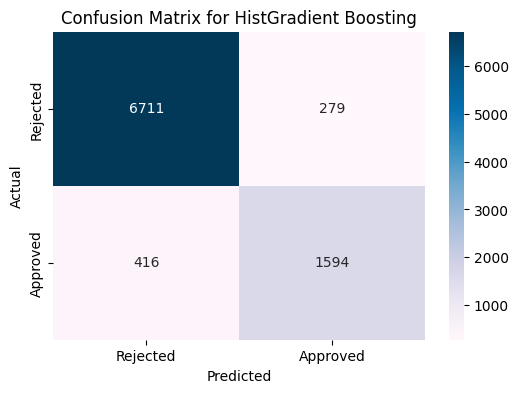



Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      6990
           1       0.62      0.93      0.75      2010

    accuracy                           0.86      9000
   macro avg       0.80      0.89      0.82      9000
weighted avg       0.90      0.86      0.87      9000



In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report



models_needing_scaling = ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']
results = []

for name, model in models.items():

    model.fit(X_train_scaled, y_train_resampled)
    y_val_pred = model.predict(X_test_scaled)
    # Train and Test Scores
    train_score = model.score(X_train_scaled, y_train_resampled)
    test_score = model.score(X_test_scaled, y_test)
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_val_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })
    
    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_val_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)